# Loading Libraries 👇👇

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor

# Loading and Previewing data 👇👇

In [2]:
train_df = pd.read_csv("../train.csv")
test_df = pd.read_csv("../test.csv")

In [3]:
train_df.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2019_00     -0.51      29.29  2019        0   
1  ID_-0.510_29.290_2019_01     -0.51      29.29  2019        1   
2  ID_-0.510_29.290_2019_02     -0.51      29.29  2019        2   
3  ID_-0.510_29.290_2019_03     -0.51      29.29  2019        3   
4  ID_-0.510_29.290_2019_04     -0.51      29.29  2019        4   

   SulphurDioxide_SO2_column_number_density  \
0                                 -0.000108   
1                                  0.000021   
2                                  0.000514   
3                                       NaN   
4                                 -0.000079   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                      0.603019   
1                                      0.728214   
2                                      0.748199   
3                                           NaN   
4                                      0.676296   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                       -0.000065   
1                                        0.000014   
2                                        0.000385   
3                                             NaN   
4                                       -0.000048   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                       0.255668                           -98.593887  ...   
1                       0.130988                            16.592861  ...   
2                       0.110018                            72.795837  ...   
3                            NaN                                  NaN  ...   
4                       0.121164                             4.121269  ...   

   Cloud_cloud_top_height  Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0             3664.436218               61085.809570              2615.120483   
1             3651.190311               66969.478735              3174.572424   
2             4216.986492               60068.894448              3516.282669   
3             5228.507736               51064.547339              4180.973322   
4             3980.598120               63751.125781              3355.710107   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                  15.568533              0.272292   
1                   8.690601              0.256830   
2                  21.103410              0.251101   
3                  15.386899              0.262043   
4                   8.114694              0.235847   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                  -12.628986                  35.632416   
1                   30.359375                  39.557633   
2                   15.377883                  30.401823   
3                  -11.293399                  24.380357   
4                   38.532263                  37.392979   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  emission  
0                -138.786423                 30.752140  3.750994  
1                -145.183930                 27.251779  4.025176  
2                -142.519545                 26.193296  4.231381  
3                -132.665828                 28.829155  4.305286  
4                -141.509805                 22.204612  4.347317  

[5 rows x 76 columns]

In [4]:
test_df.head()

ID_LAT_LON_YEAR_WEEK  latitude  longitude  year  week_no  \
0  ID_-0.510_29.290_2022_00     -0.51      29.29  2022        0   
1  ID_-0.510_29.290_2022_01     -0.51      29.29  2022        1   
2  ID_-0.510_29.290_2022_02     -0.51      29.29  2022        2   
3  ID_-0.510_29.290_2022_03     -0.51      29.29  2022        3   
4  ID_-0.510_29.290_2022_04     -0.51      29.29  2022        4   

   SulphurDioxide_SO2_column_number_density  \
0                                       NaN   
1                                  0.000456   
2                                  0.000161   
3                                  0.000350   
4                                 -0.000317   

   SulphurDioxide_SO2_column_number_density_amf  \
0                                           NaN   
1                                      0.691164   
2                                      0.605107   
3                                      0.696917   
4                                      0.580527   

   SulphurDioxide_SO2_slant_column_number_density  \
0                                             NaN   
1                                        0.000316   
2                                        0.000106   
3                                        0.000243   
4                                       -0.000184   

   SulphurDioxide_cloud_fraction  SulphurDioxide_sensor_azimuth_angle  ...  \
0                            NaN                                  NaN  ...   
1                       0.000000                            76.239196  ...   
2                       0.079870                           -42.055341  ...   
3                       0.201028                            72.169566  ...   
4                       0.204352                            76.190865  ...   

   Cloud_cloud_top_pressure  Cloud_cloud_top_height  \
0              36022.027344             8472.313477   
1              48539.737242             6476.147323   
2              34133.080469             8984.795703   
3              50854.991076             6014.724059   
4              46594.685145             6849.280477   

   Cloud_cloud_base_pressure  Cloud_cloud_base_height  \
0               41047.937500              7472.313477   
1               54915.708579              5476.147161   
2               39006.093750              7984.795703   
3               57646.368368              5014.724115   
4               52896.541873              5849.280394   

   Cloud_cloud_optical_depth  Cloud_surface_albedo  \
0                   7.935617              0.240773   
1                  11.448437              0.293119   
2                  10.753179              0.267130   
3                  11.764556              0.304679   
4                  13.065317              0.284221   

   Cloud_sensor_azimuth_angle  Cloud_sensor_zenith_angle  \
0                 -100.113792                  33.697044   
1                  -30.510319                  42.402593   
2                   39.087361                  45.936480   
3                  -24.465127                  42.140419   
4                  -12.907850                  30.122641   

   Cloud_solar_azimuth_angle  Cloud_solar_zenith_angle  
0                -133.047546                 33.779583  
1                -138.632822                 31.012380  
2                -144.784988                 26.743361  
3                -135.027891                 29.604774  
4                -135.500119                 26.276807  

[5 rows x 75 columns]

In [5]:
print(f"The dimension of the Training dataset is {train_df.shape}")
print(f"The dimension of the Testing dataset is {test_df.shape}")

The dimension of the Training dataset is (79023, 76)
The dimension of the Testing dataset is (24353, 75)


In [6]:
train_df.describe()['emission']

count    79023.000000
mean        81.940552
std        144.299648
min          0.000000
25%          9.797995
50%         45.593445
75%        109.549595
max       3167.768000
Name: emission, dtype: float64

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

# Missing Values 👇👇

The following two cells will tell us the percentage(%) of missing values of Training and testing Dataset

In [8]:
train_df.isnull().sum().sort_values(ascending=False)*100/len(train_df)

UvAerosolLayerHeight_aerosol_height          99.444466
UvAerosolLayerHeight_solar_zenith_angle      99.444466
UvAerosolLayerHeight_solar_azimuth_angle     99.444466
UvAerosolLayerHeight_sensor_azimuth_angle    99.444466
UvAerosolLayerHeight_aerosol_pressure        99.444466
                                               ...    
latitude                                      0.000000
week_no                                       0.000000
year                                          0.000000
longitude                                     0.000000
emission                                      0.000000
Length: 76, dtype: float64

In [9]:
test_df.isnull().sum().sort_values(ascending=False)*100/len(test_df)

UvAerosolLayerHeight_aerosol_pressure         91.405576
UvAerosolLayerHeight_aerosol_optical_depth    91.405576
UvAerosolLayerHeight_sensor_zenith_angle      91.405576
UvAerosolLayerHeight_sensor_azimuth_angle     91.405576
UvAerosolLayerHeight_aerosol_height           91.405576
                                                ...    
latitude                                       0.000000
week_no                                        0.000000
year                                           0.000000
longitude                                      0.000000
ID_LAT_LON_YEAR_WEEK                           0.000000
Length: 75, dtype: float64

In [10]:
not_null_columns = ((train_df.isnull().sum() == 0).sum(), (test_df.isnull().sum() == 0).sum())
print(f"Number of Columns with no missing values in the Training DataSet is {not_null_columns[0]}")
print(f"Number of Columns with no missing values in the Testing DataSet is {not_null_columns[1]}")

Number of Columns with no missing values in the Training DataSet is 6
Number of Columns with no missing values in the Testing DataSet is 5


# Exploratory Data Analysis 📈👇

## Emission Distribution

### Distribution of Emission

Target Variable - emission, we first need the distribution of Emission

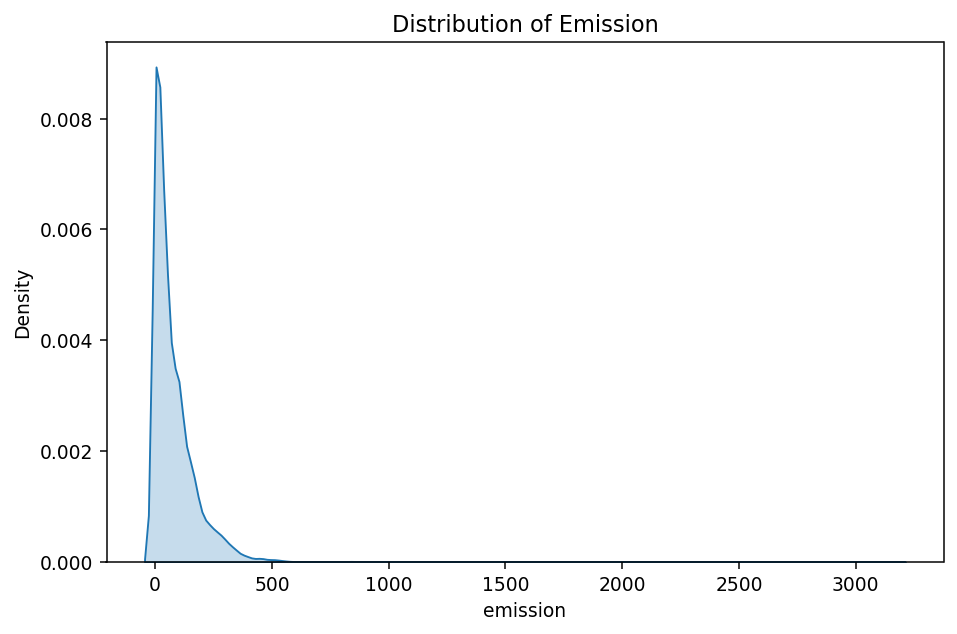

In [11]:
plt.figure(figsize=(8,5), dpi=135)
sns.kdeplot(data=train_df, x = 'emission', fill=True)
plt.title("Distribution of Emission");

From the above plot, we can see that the distribution of emission is right-skewed.
Skewness is the degree of asymmetry observed in a probability distribution.

In [12]:
print(f"The Skewness of the distribution of emission is: {train_df.emission.skew()}")

The Skewness of the distribution of emission is: 10.173825825101622


### Distribution of Emission in different Years

The following cell will tell us about the distribution of emission for different years.

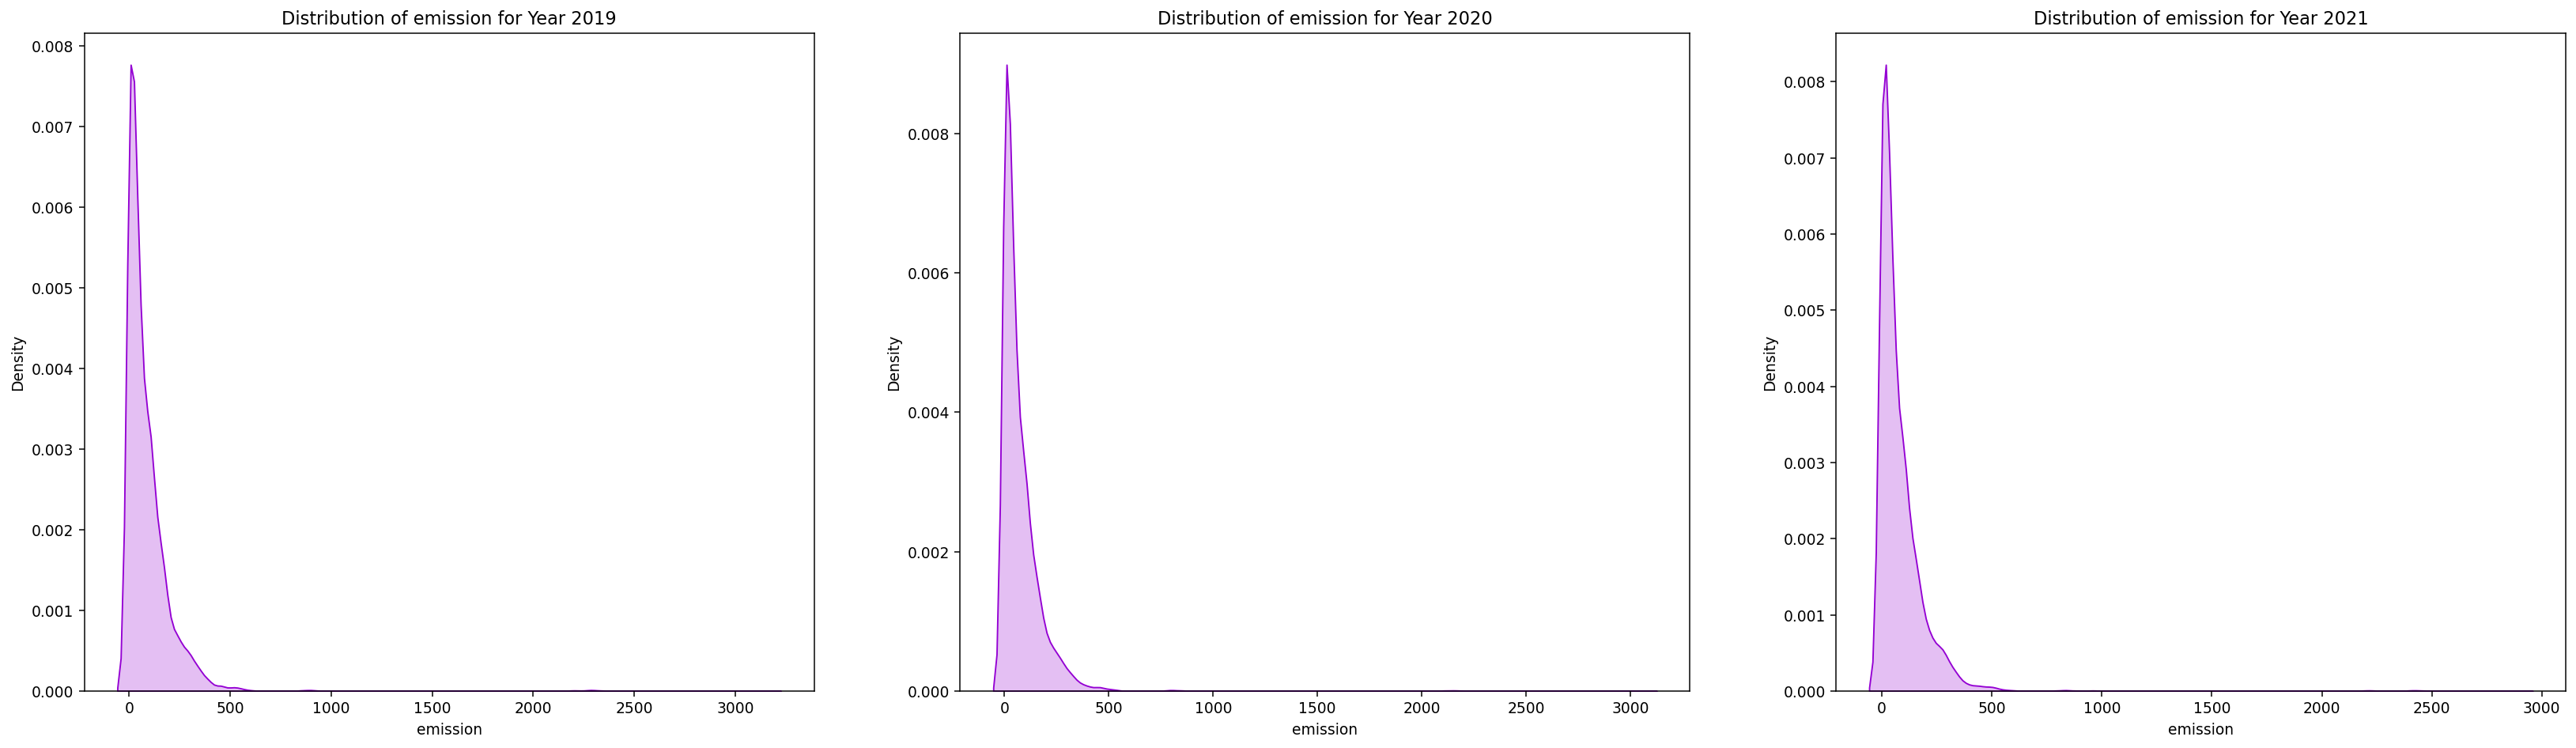

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,8), dpi = 135)
sns.kdeplot(ax=axes[0], data = train_df[train_df['year'] == 2019], x='emission',fill=True, color='darkviolet')
axes[0].set_title("Distribution of emission for Year 2019")
sns.kdeplot(ax=axes[1], data = train_df[train_df['year'] == 2020], x='emission', fill=True, color='darkviolet')
axes[1].set_title("Distribution of emission for Year 2020")
sns.kdeplot(ax=axes[2], data = train_df[train_df['year'] == 2021], x='emission', fill=True, color='darkviolet')
axes[2].set_title("Distribution of emission for Year 2021");

### Distibution of Emission over Week

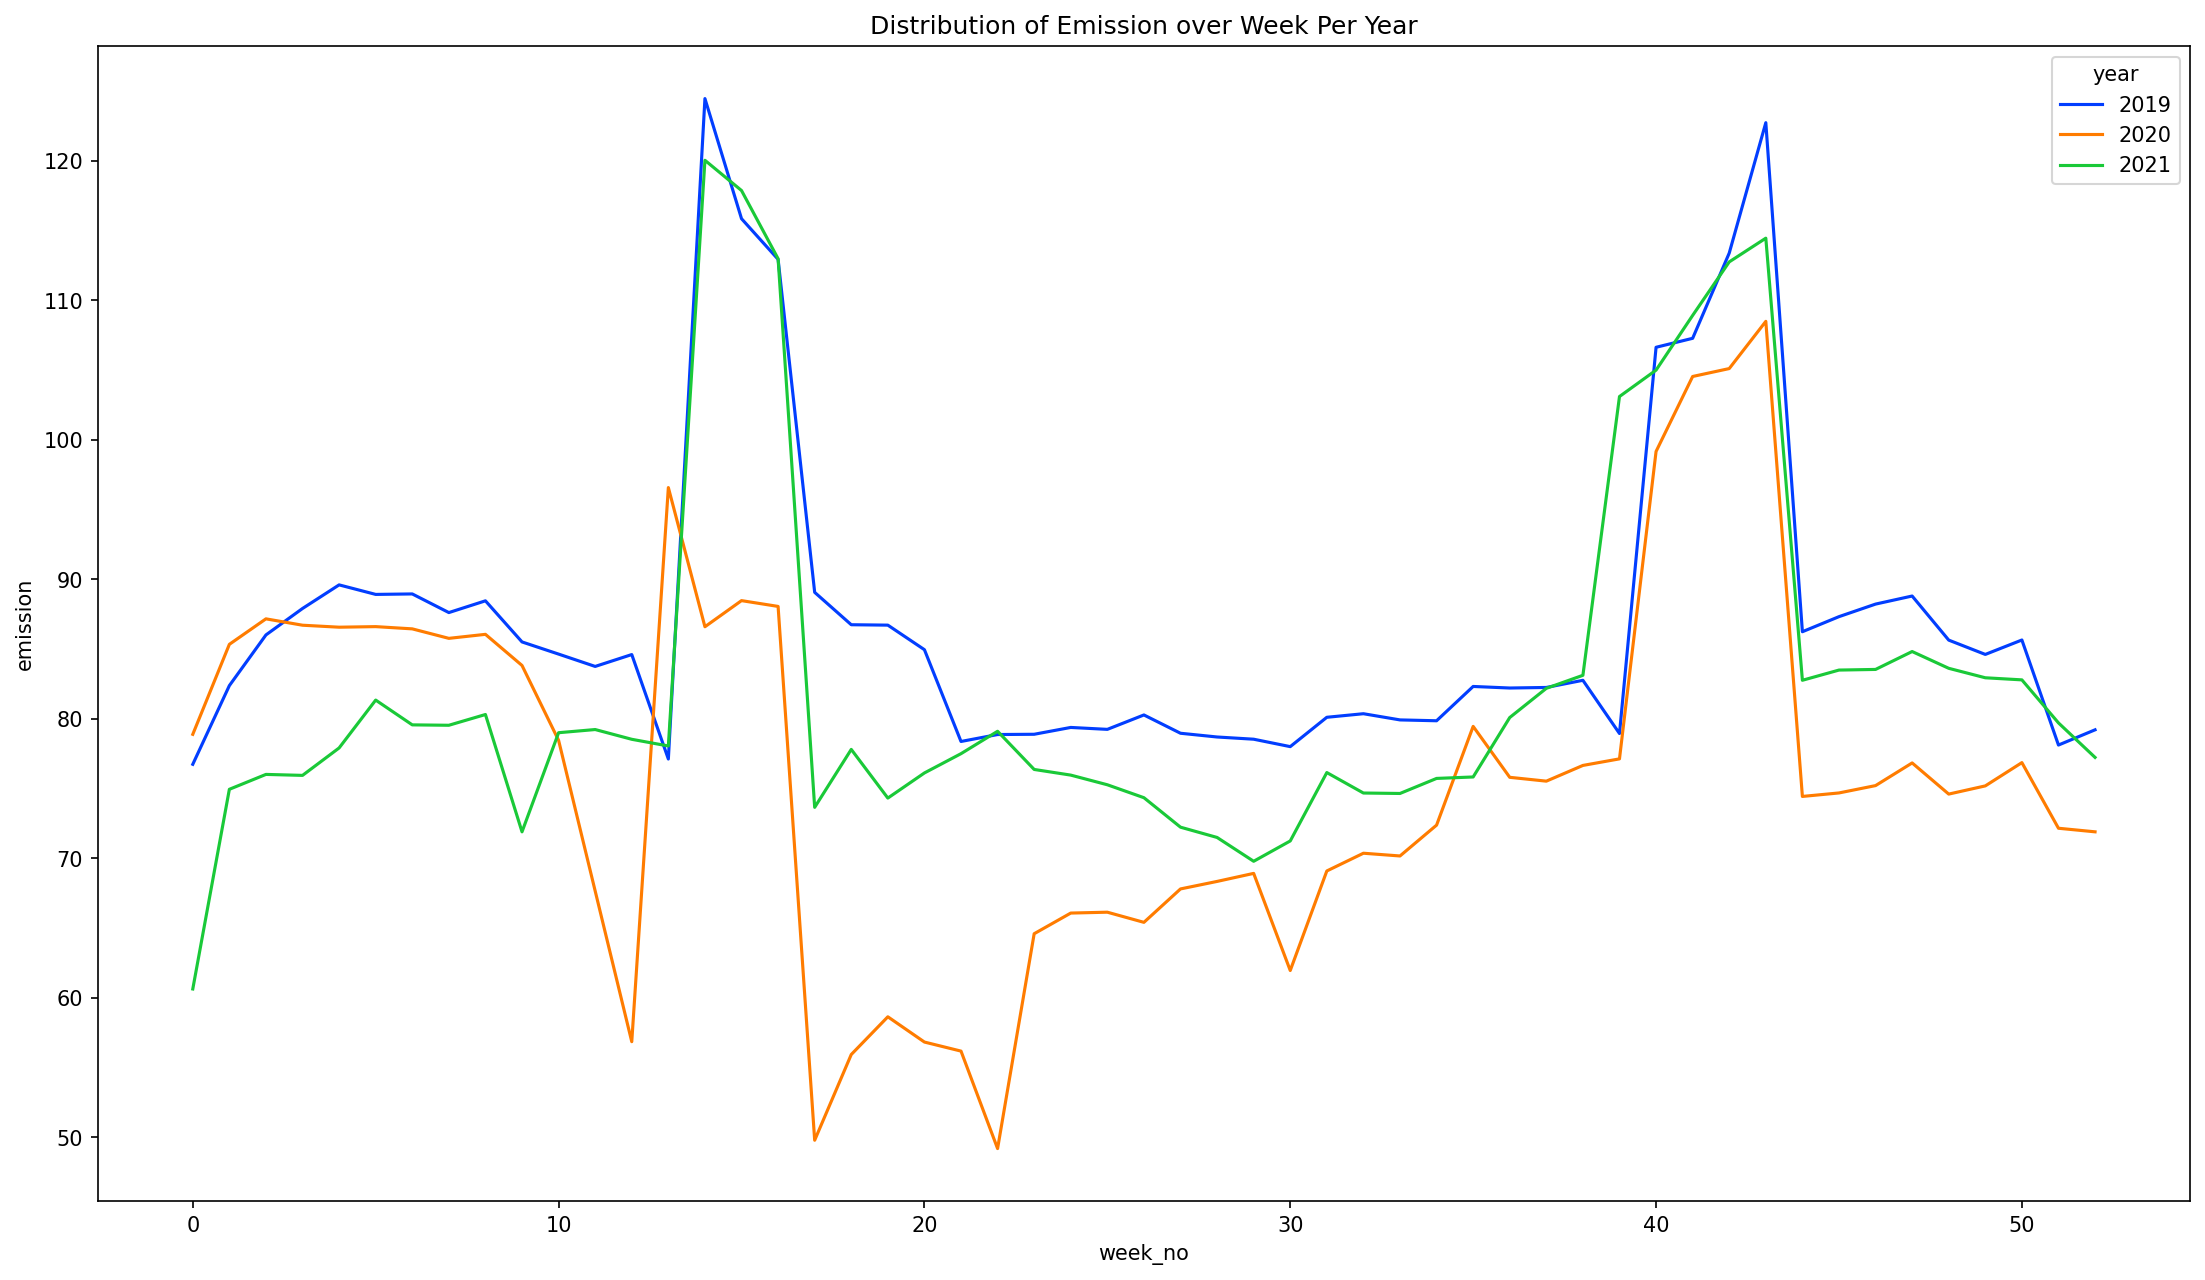

In [14]:
plt.figure(figsize=(18, 10), dpi=150)
sns.lineplot(data=train_df, x='week_no', y='emission', hue='year', errorbar=None, palette='bright')
plt.title("Distribution of Emission over Week Per Year");

From the Distibution:
<ul>
    <li>We can see that there is a spike around week_no: 15 and 42.</li>
    <li>We can see that because of the COVID-19 outbreak, the emissions in 2020 are much lower than in other years.
</ul>

### Adding the Date Column and Emission Distribution

In [15]:
prac_train = train_df.copy(deep=True)

In [16]:
# Creating the Date Column
prac_train['Date'] = pd.to_datetime(prac_train['year'].astype(str) + '-' + prac_train['week_no'].astype(str) + '-0', format='%Y-%W-%w')

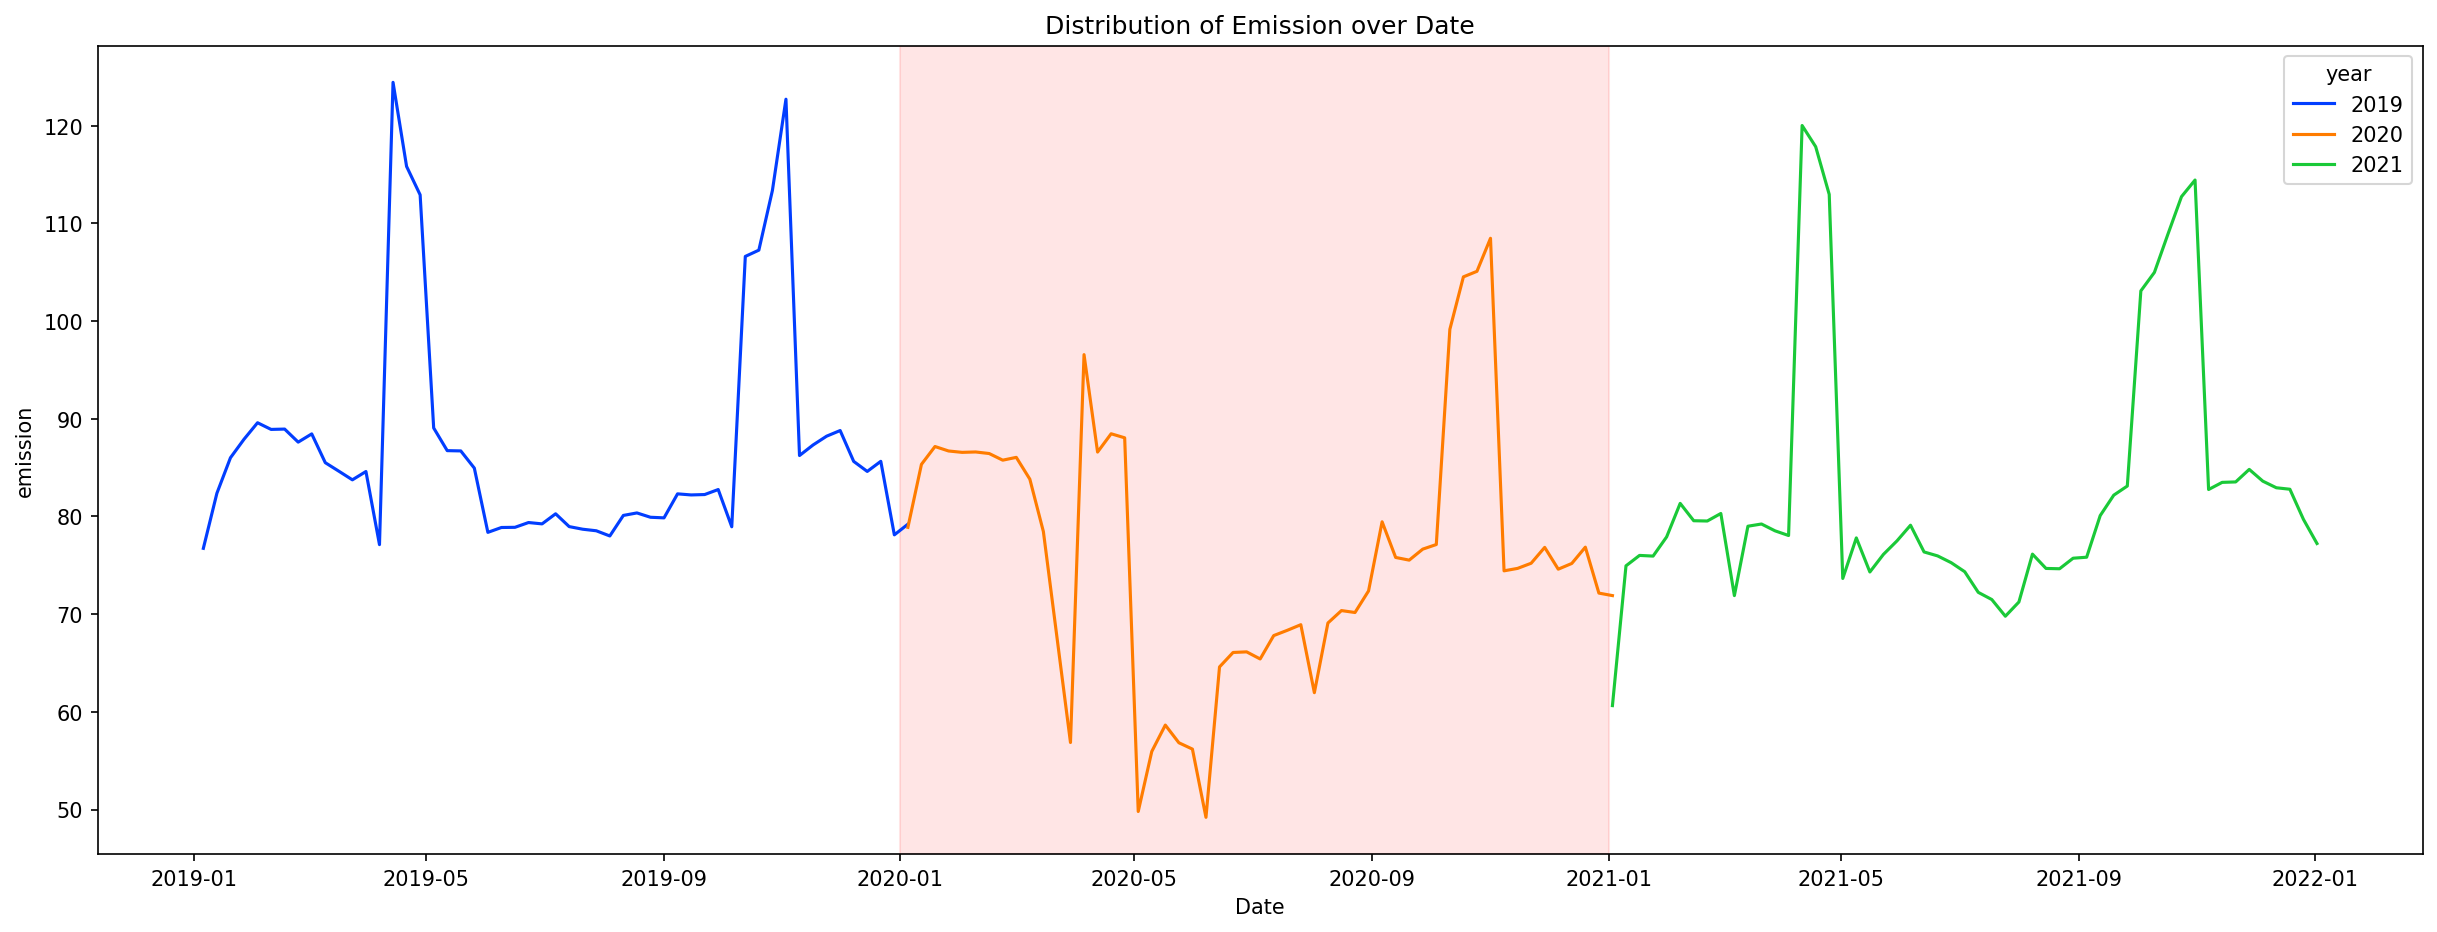

In [17]:
plt.figure(figsize=(20,7), dpi=150)
sns.lineplot(data=prac_train, x='Date', y='emission', hue = 'year', errorbar=None, palette='bright')
plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-01-01'), alpha=0.1, color='red');
plt.title("Distribution of Emission over Date");

From the Graphs we can see that the emissions for Year 2020 are relatively less than the remaining two years.

## Outliers in the Dataset

Outliers in the dataset(shown using boxplot)

<Axes: ylabel='emission'>

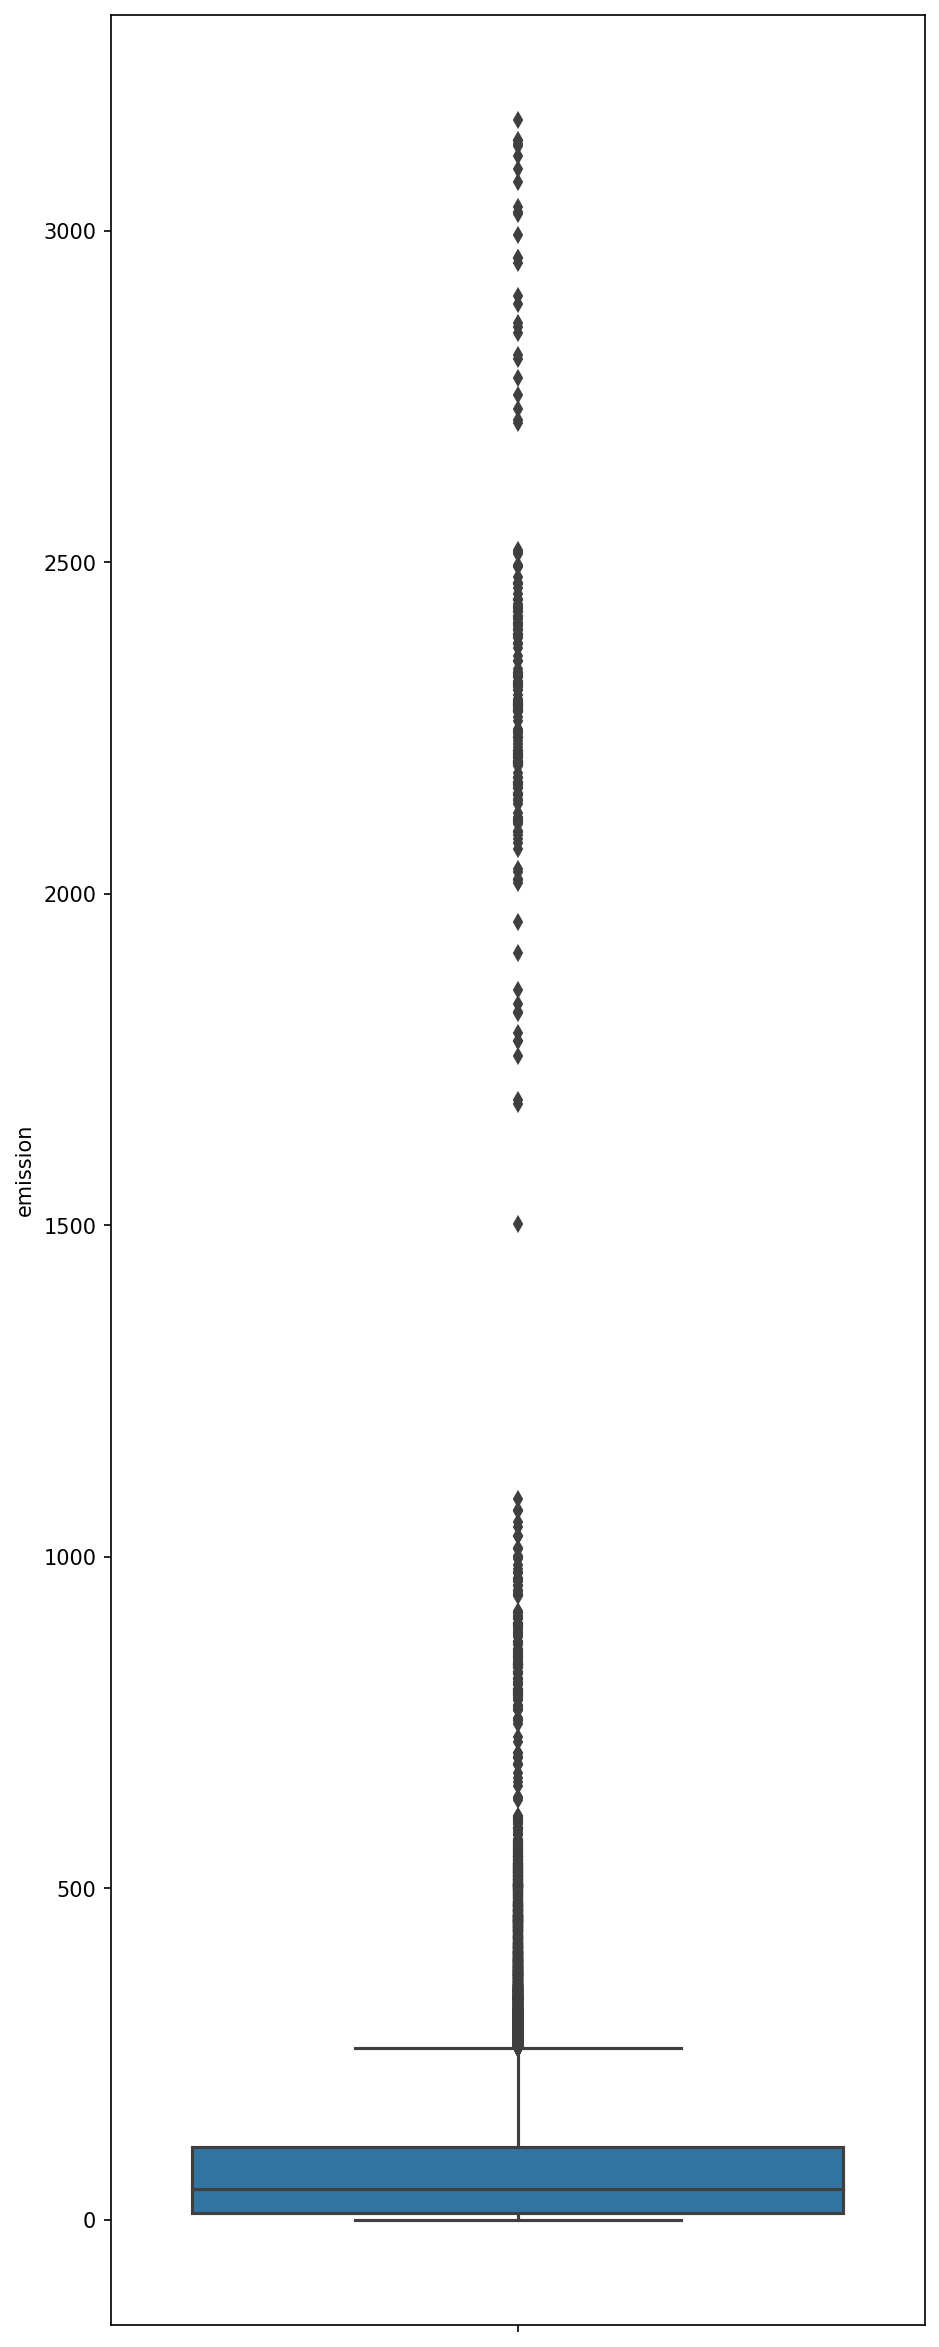

In [18]:
plt.figure(figsize=(7, 20), dpi=150)
sns.boxplot(data = train_df, y='emission')

In [19]:
maximum = train_df.describe()['emission']['75%'] + (train_df.describe()['emission']['75%'] - train_df.describe()['emission']['25%'])*1.5
percent_outliers = len(train_df[train_df['emission'] > maximum])*100/len(train_df)
print(f"The percentage of Outliers in the dataset is {percent_outliers}%")

The percentage of Outliers in the dataset is 5.409817394935652%


## Visualization of Emission at each location

In [20]:
fig = px.scatter_mapbox(train_df[train_df['year'] == 2019], 
                        lat = 'latitude', 
                        lon = 'longitude',
                        size='emission',
                        size_max=15,
                        zoom = 10,
                        mapbox_style = "open-street-map",
                        height=1080,
                        width=1920)
fig.show();

## Correlation between different group of features and emission

Relationship between Sulphur Dioxide Features and Emission

In [21]:
sulf_diox_feat = ['SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km', 'emission']

In [22]:
train_df[sulf_diox_feat].corr()['emission']

SulphurDioxide_SO2_column_number_density         -0.019126
SulphurDioxide_SO2_column_number_density_amf      0.000347
SulphurDioxide_SO2_slant_column_number_density   -0.021959
SulphurDioxide_cloud_fraction                     0.006195
SulphurDioxide_sensor_azimuth_angle              -0.025079
SulphurDioxide_sensor_zenith_angle               -0.005704
SulphurDioxide_solar_azimuth_angle               -0.032338
SulphurDioxide_solar_zenith_angle                -0.001401
SulphurDioxide_SO2_column_number_density_15km    -0.022011
emission                                          1.000000
Name: emission, dtype: float64

<Axes: >

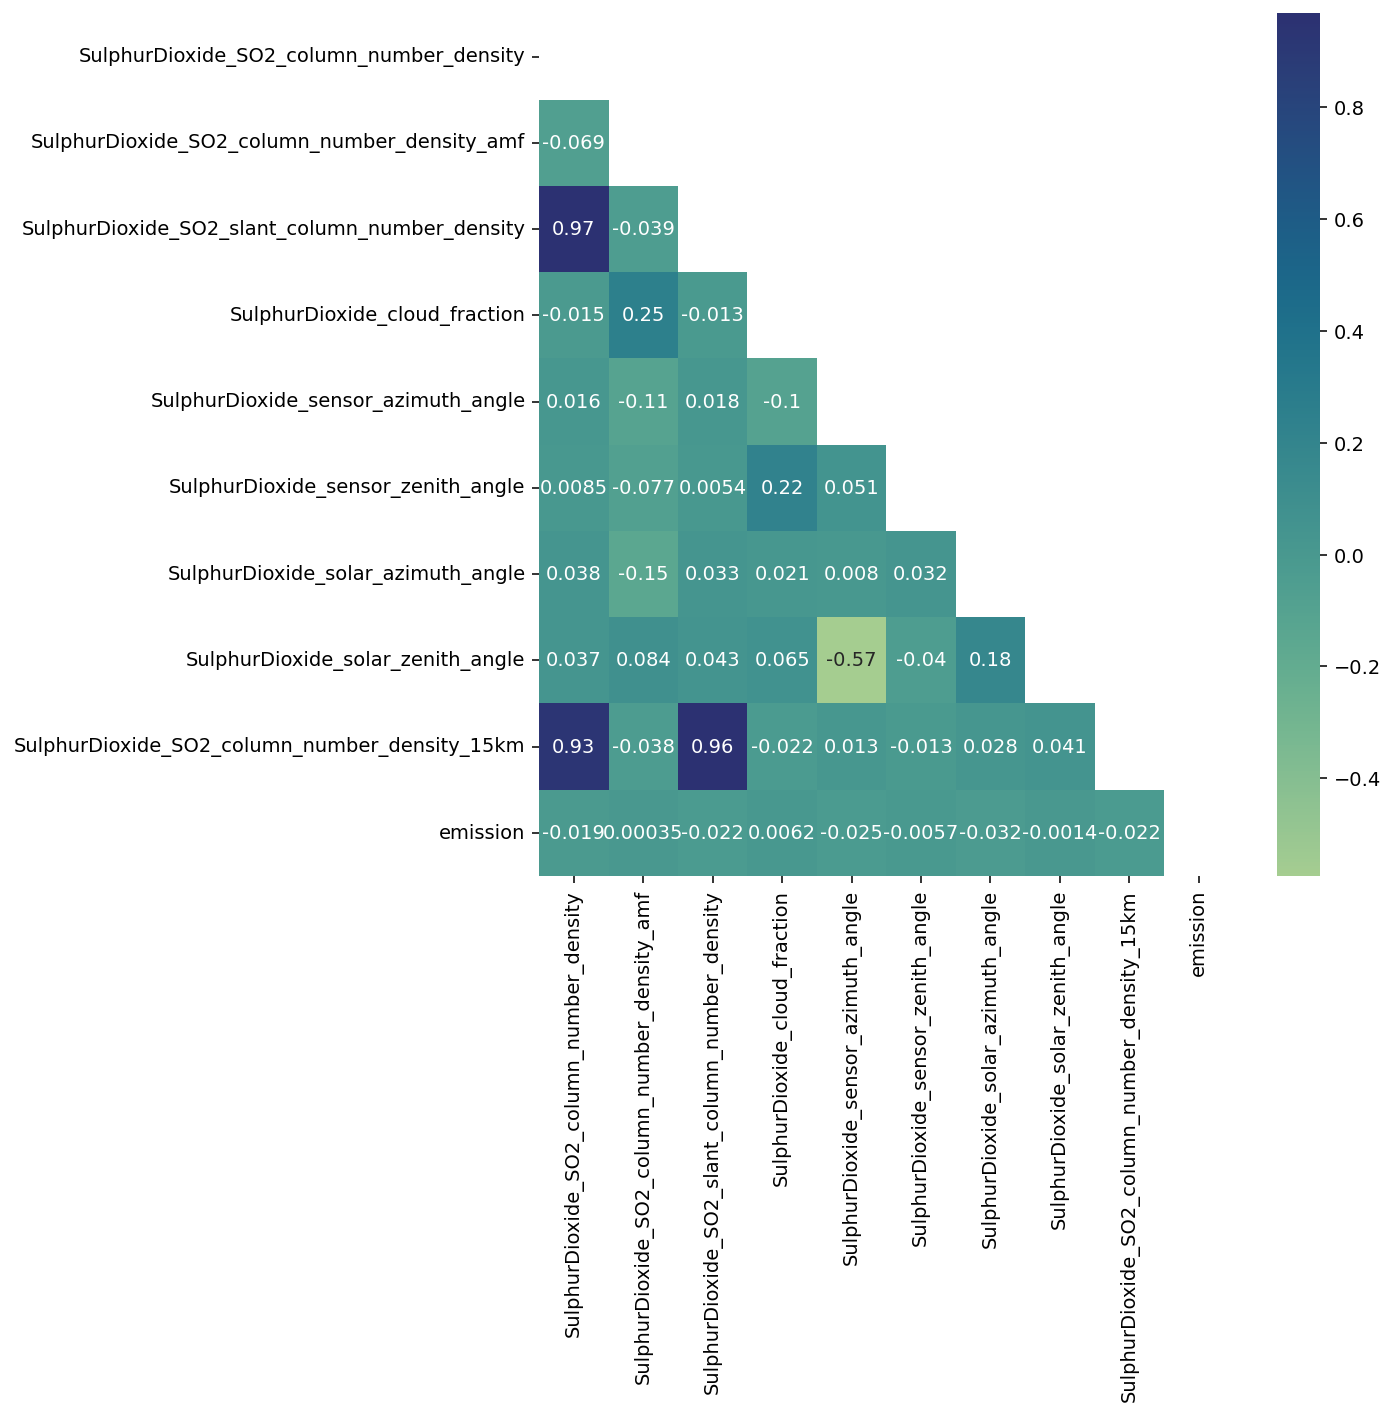

In [23]:
plt.figure(figsize=(8,8), dpi=140)
matrix = np.triu(train_df[sulf_diox_feat].corr())
sns.heatmap(data = train_df[sulf_diox_feat].corr(), annot=True, cmap='crest', mask=matrix)

Relationship between Carbon Monoxide Features and Emission

In [24]:
carb_mono_feat = ['CarbonMonoxide_CO_column_number_density',
                  'CarbonMonoxide_H2O_column_number_density',
                  'CarbonMonoxide_cloud_height', 
                  'CarbonMonoxide_sensor_altitude',
                  'CarbonMonoxide_sensor_azimuth_angle',
                  'CarbonMonoxide_sensor_zenith_angle',
                  'CarbonMonoxide_solar_azimuth_angle',
                  'CarbonMonoxide_solar_zenith_angle',
                  'emission']

In [25]:
train_df[carb_mono_feat].corr()['emission']

CarbonMonoxide_CO_column_number_density    -0.041328
CarbonMonoxide_H2O_column_number_density   -0.043217
CarbonMonoxide_cloud_height                -0.010431
CarbonMonoxide_sensor_altitude             -0.001865
CarbonMonoxide_sensor_azimuth_angle        -0.003252
CarbonMonoxide_sensor_zenith_angle         -0.000816
CarbonMonoxide_solar_azimuth_angle         -0.026282
CarbonMonoxide_solar_zenith_angle          -0.018803
emission                                    1.000000
Name: emission, dtype: float64

<Axes: >

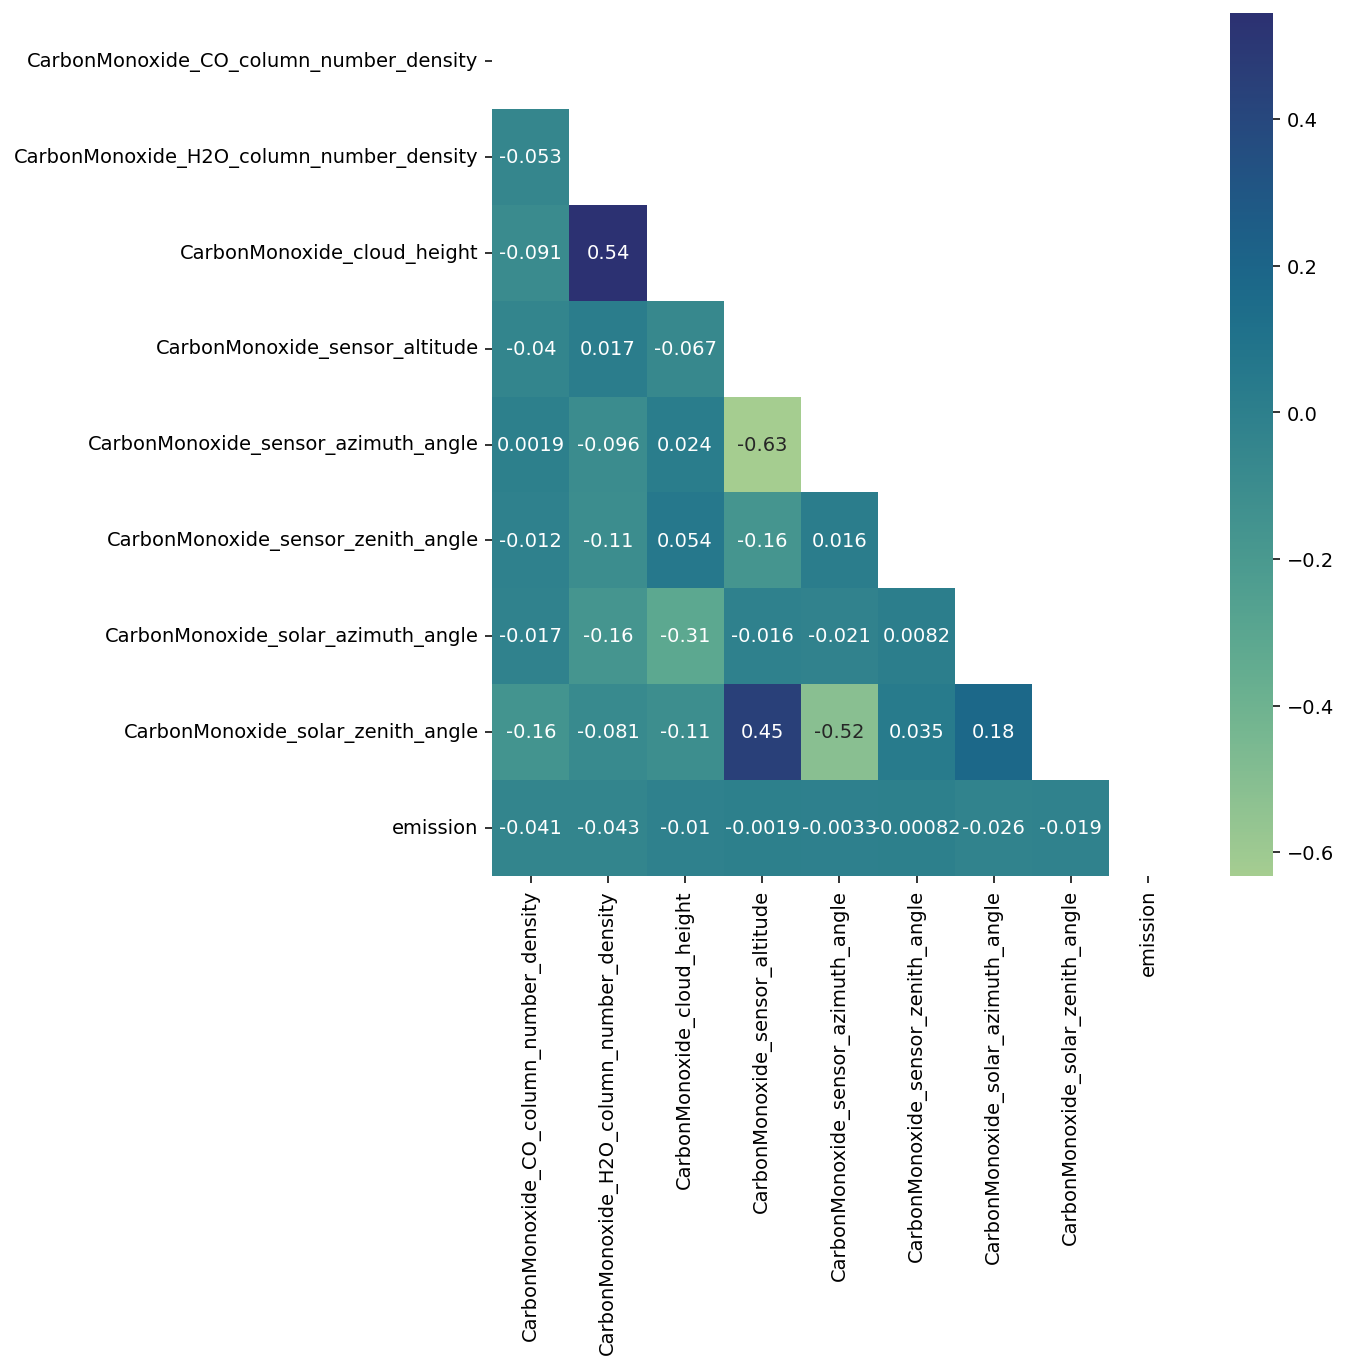

In [26]:
plt.figure(figsize=(8,8), dpi=140)
matrix = np.triu(train_df[carb_mono_feat].corr())
sns.heatmap(data = train_df[carb_mono_feat].corr(), annot=True, cmap='crest', mask=matrix)

Relationship between Nitrogen Dioxide Features and Emission

In [27]:
nitro_diox_feat = ['NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_column_number_density',
       'NitrogenDioxide_NO2_slant_column_number_density',
       'NitrogenDioxide_tropopause_pressure',
       'NitrogenDioxide_absorbing_aerosol_index',
       'NitrogenDioxide_cloud_fraction', 'NitrogenDioxide_sensor_altitude',
       'NitrogenDioxide_sensor_azimuth_angle',
       'NitrogenDioxide_sensor_zenith_angle',
       'NitrogenDioxide_solar_azimuth_angle',
       'NitrogenDioxide_solar_zenith_angle','emission']

In [28]:
train_df[nitro_diox_feat].corr()['emission']

NitrogenDioxide_NO2_column_number_density                 -0.005920
NitrogenDioxide_tropospheric_NO2_column_number_density     0.002513
NitrogenDioxide_stratospheric_NO2_column_number_density   -0.015480
NitrogenDioxide_NO2_slant_column_number_density           -0.013575
NitrogenDioxide_tropopause_pressure                       -0.001886
NitrogenDioxide_absorbing_aerosol_index                    0.020905
NitrogenDioxide_cloud_fraction                             0.022456
NitrogenDioxide_sensor_altitude                            0.027540
NitrogenDioxide_sensor_azimuth_angle                      -0.027104
NitrogenDioxide_sensor_zenith_angle                       -0.007445
NitrogenDioxide_solar_azimuth_angle                       -0.033417
NitrogenDioxide_solar_zenith_angle                         0.005469
emission                                                   1.000000
Name: emission, dtype: float64

<Axes: >

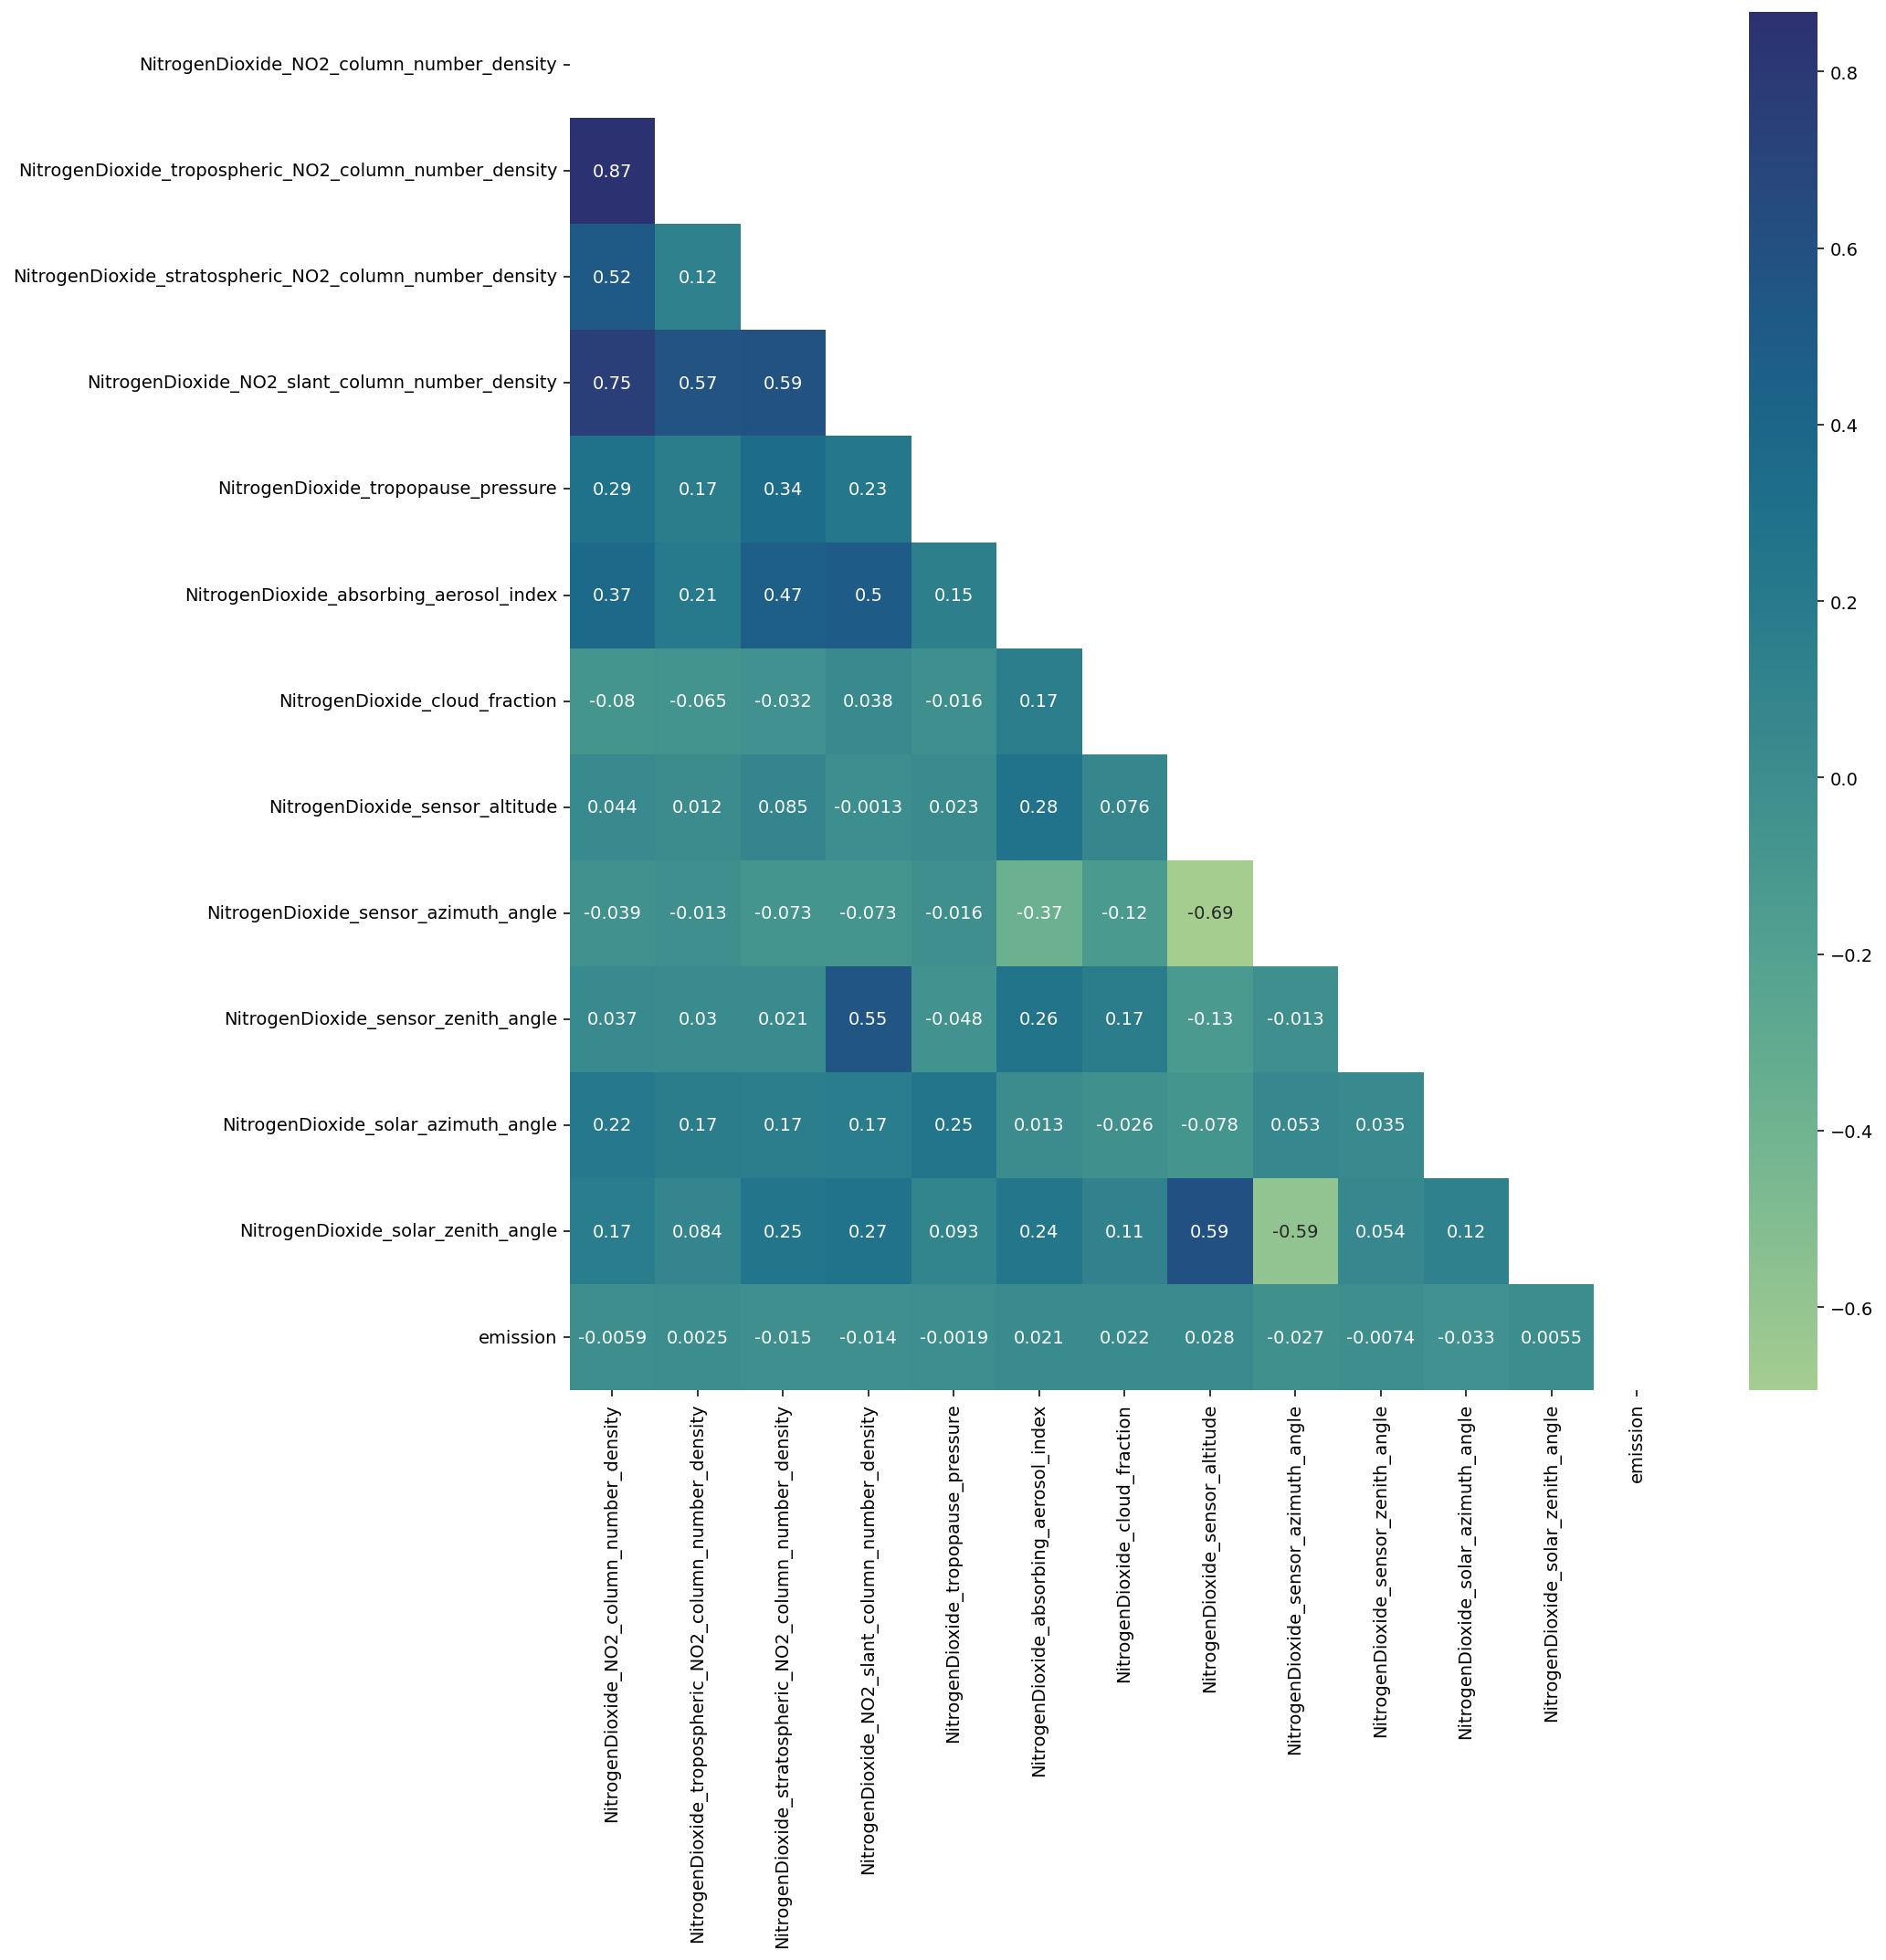

In [29]:
plt.figure(figsize=(14,14), dpi=140)
matrix = np.triu(train_df[nitro_diox_feat].corr())
sns.heatmap(data = train_df[nitro_diox_feat].corr(), annot=True, cmap='crest', mask=matrix)

Relationship Between Formaldehyde features and Emission

In [30]:
formaldehyde_features = ['Formaldehyde_tropospheric_HCHO_column_number_density',
       'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
       'Formaldehyde_HCHO_slant_column_number_density',
       'Formaldehyde_cloud_fraction', 'Formaldehyde_solar_zenith_angle',
       'Formaldehyde_solar_azimuth_angle', 'Formaldehyde_sensor_zenith_angle',
       'Formaldehyde_sensor_azimuth_angle','emission']

In [31]:
train_df[formaldehyde_features].corr()['emission']

Formaldehyde_tropospheric_HCHO_column_number_density       -0.033333
Formaldehyde_tropospheric_HCHO_column_number_density_amf    0.040263
Formaldehyde_HCHO_slant_column_number_density              -0.022874
Formaldehyde_cloud_fraction                                 0.001254
Formaldehyde_solar_zenith_angle                            -0.003780
Formaldehyde_solar_azimuth_angle                           -0.030815
Formaldehyde_sensor_zenith_angle                           -0.004879
Formaldehyde_sensor_azimuth_angle                          -0.021216
emission                                                    1.000000
Name: emission, dtype: float64

<Axes: >

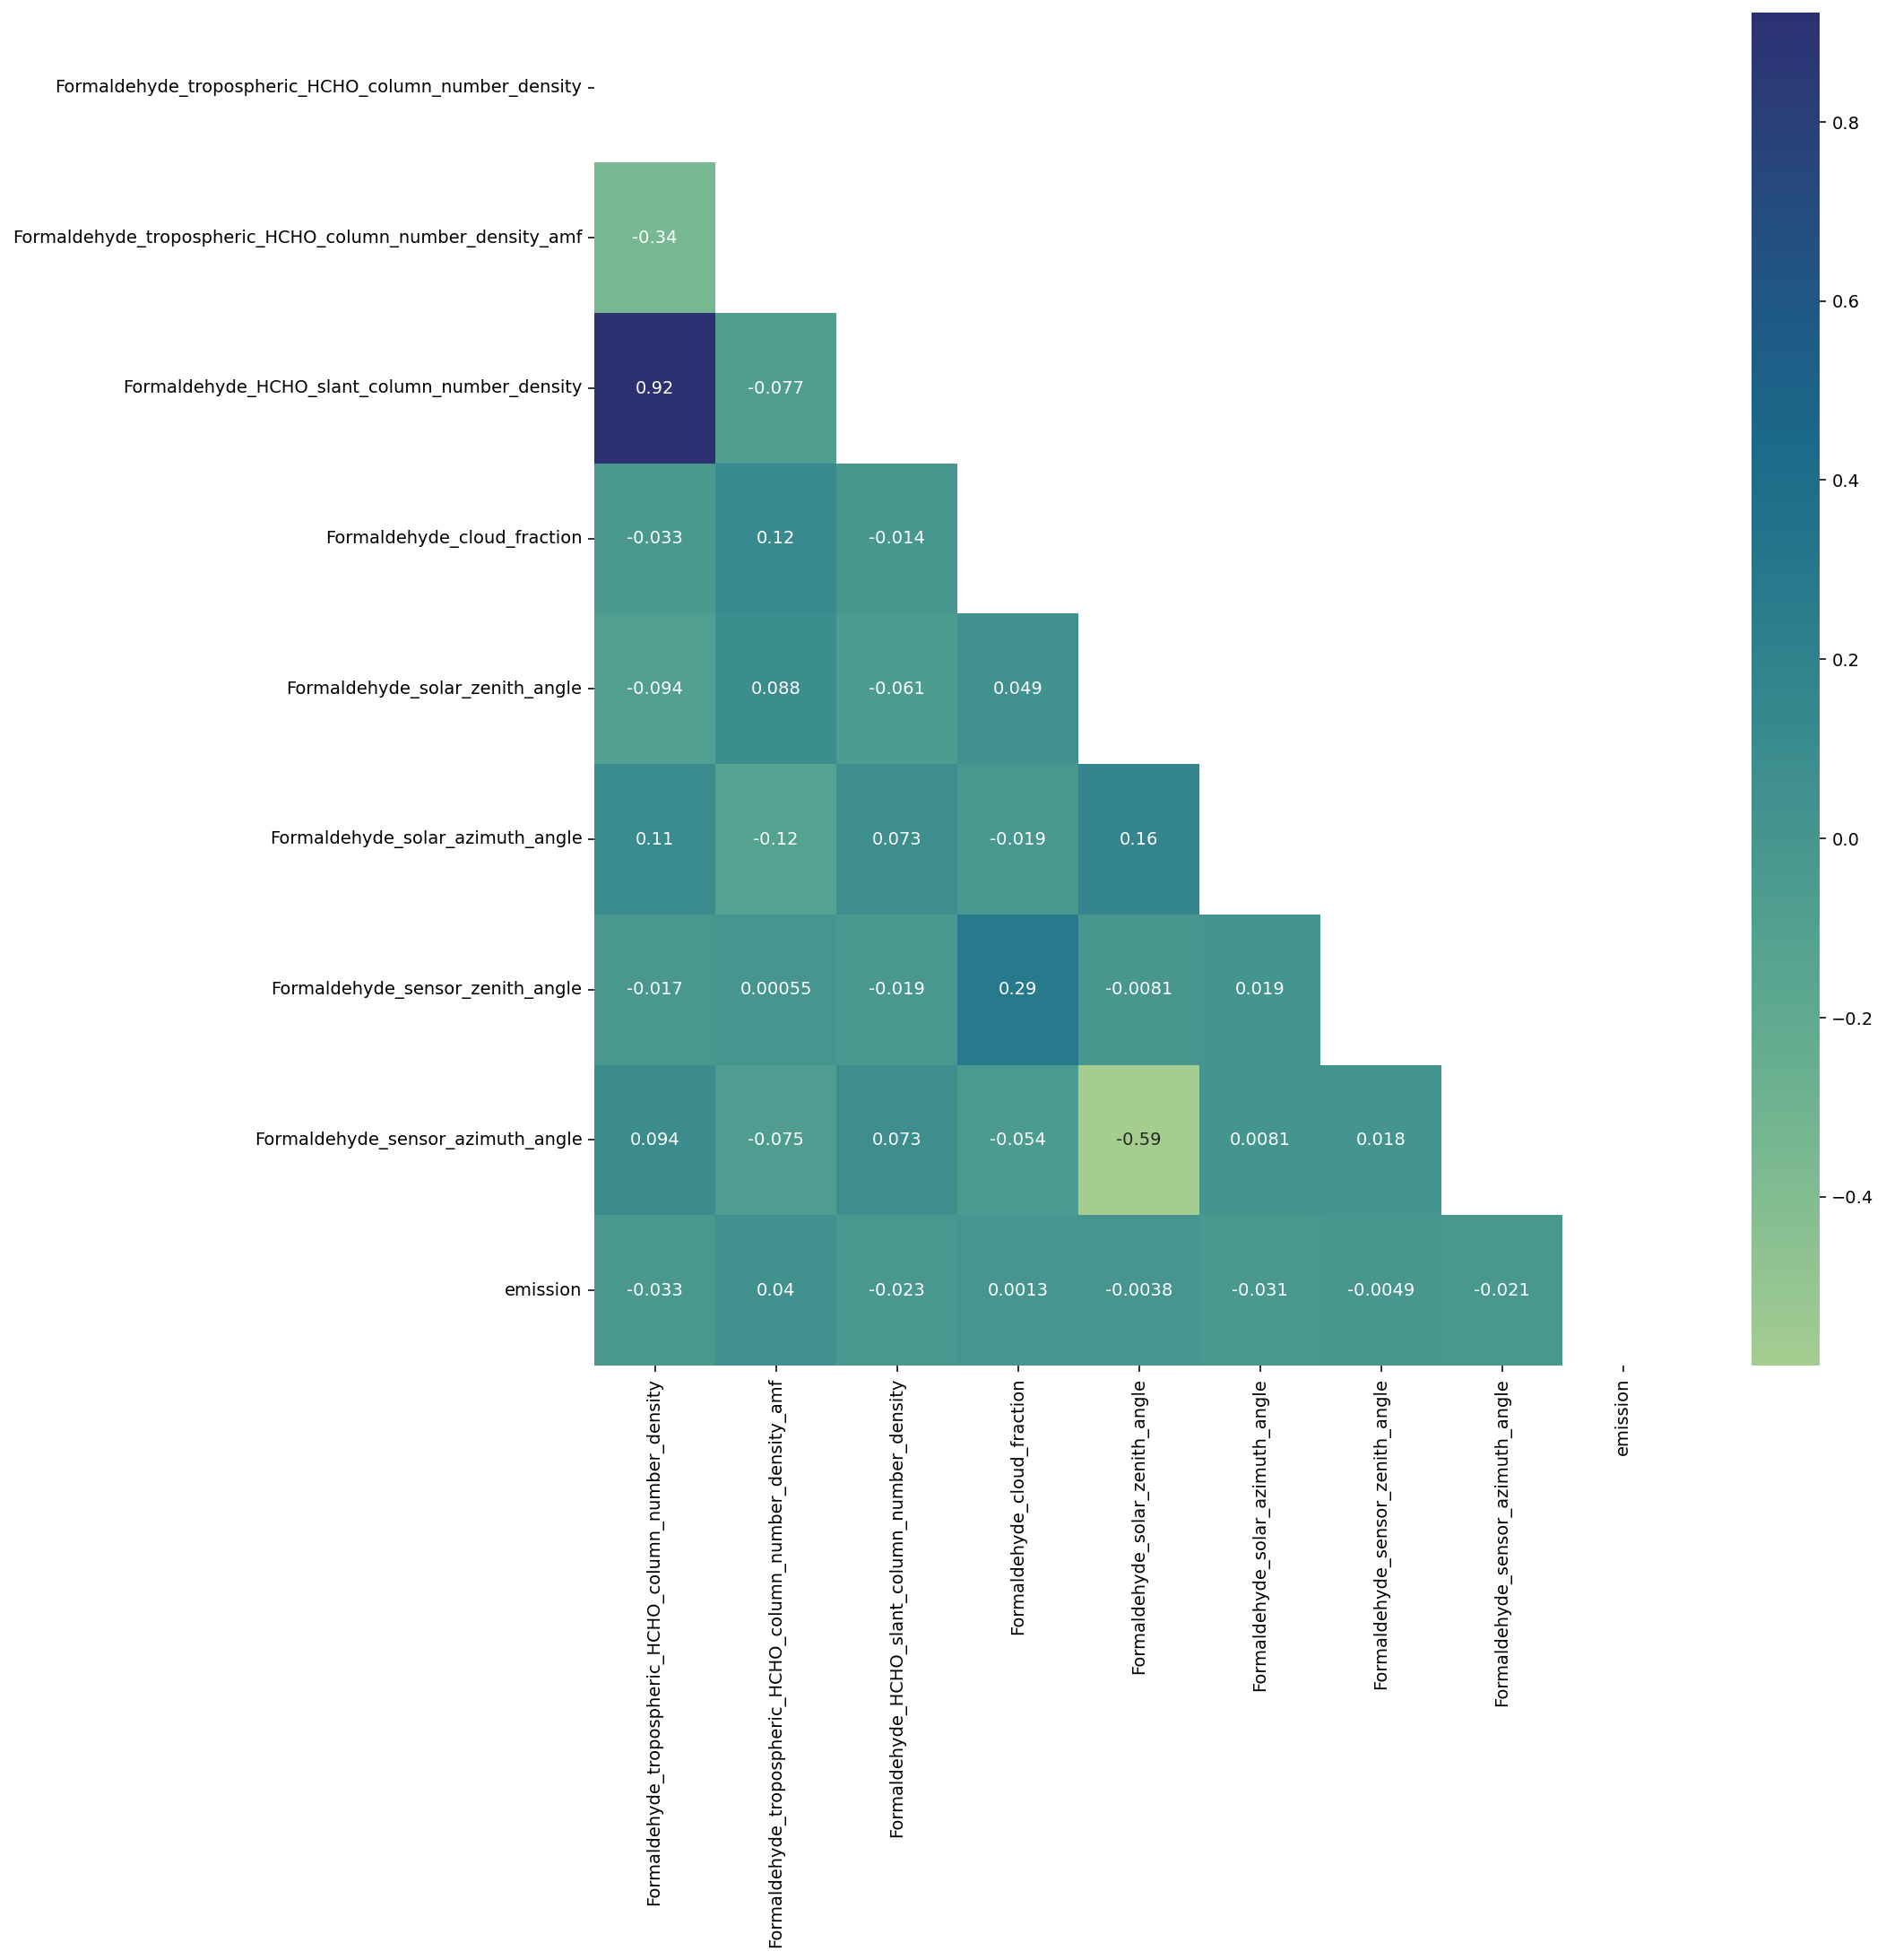

In [32]:
plt.figure(figsize=(14,14), dpi=140)
matrix = np.triu(train_df[formaldehyde_features].corr())
sns.heatmap(data = train_df[formaldehyde_features].corr(), annot=True, cmap='crest', mask=matrix)

Relationship Between Ozone Features and Emission

In [33]:
ozone_feat = ['Ozone_O3_column_number_density',
       'Ozone_O3_column_number_density_amf',
       'Ozone_O3_slant_column_number_density',
       'Ozone_O3_effective_temperature', 'Ozone_cloud_fraction',
       'Ozone_sensor_azimuth_angle', 'Ozone_sensor_zenith_angle',
       'Ozone_solar_azimuth_angle', 'Ozone_solar_zenith_angle','emission']

In [34]:
train_df[ozone_feat].corr()['emission']

Ozone_O3_column_number_density          0.013811
Ozone_O3_column_number_density_amf     -0.013846
Ozone_O3_slant_column_number_density   -0.005834
Ozone_O3_effective_temperature         -0.008182
Ozone_cloud_fraction                    0.000569
Ozone_sensor_azimuth_angle              0.007774
Ozone_sensor_zenith_angle              -0.005931
Ozone_solar_azimuth_angle              -0.024847
Ozone_solar_zenith_angle               -0.022490
emission                                1.000000
Name: emission, dtype: float64

<Axes: >

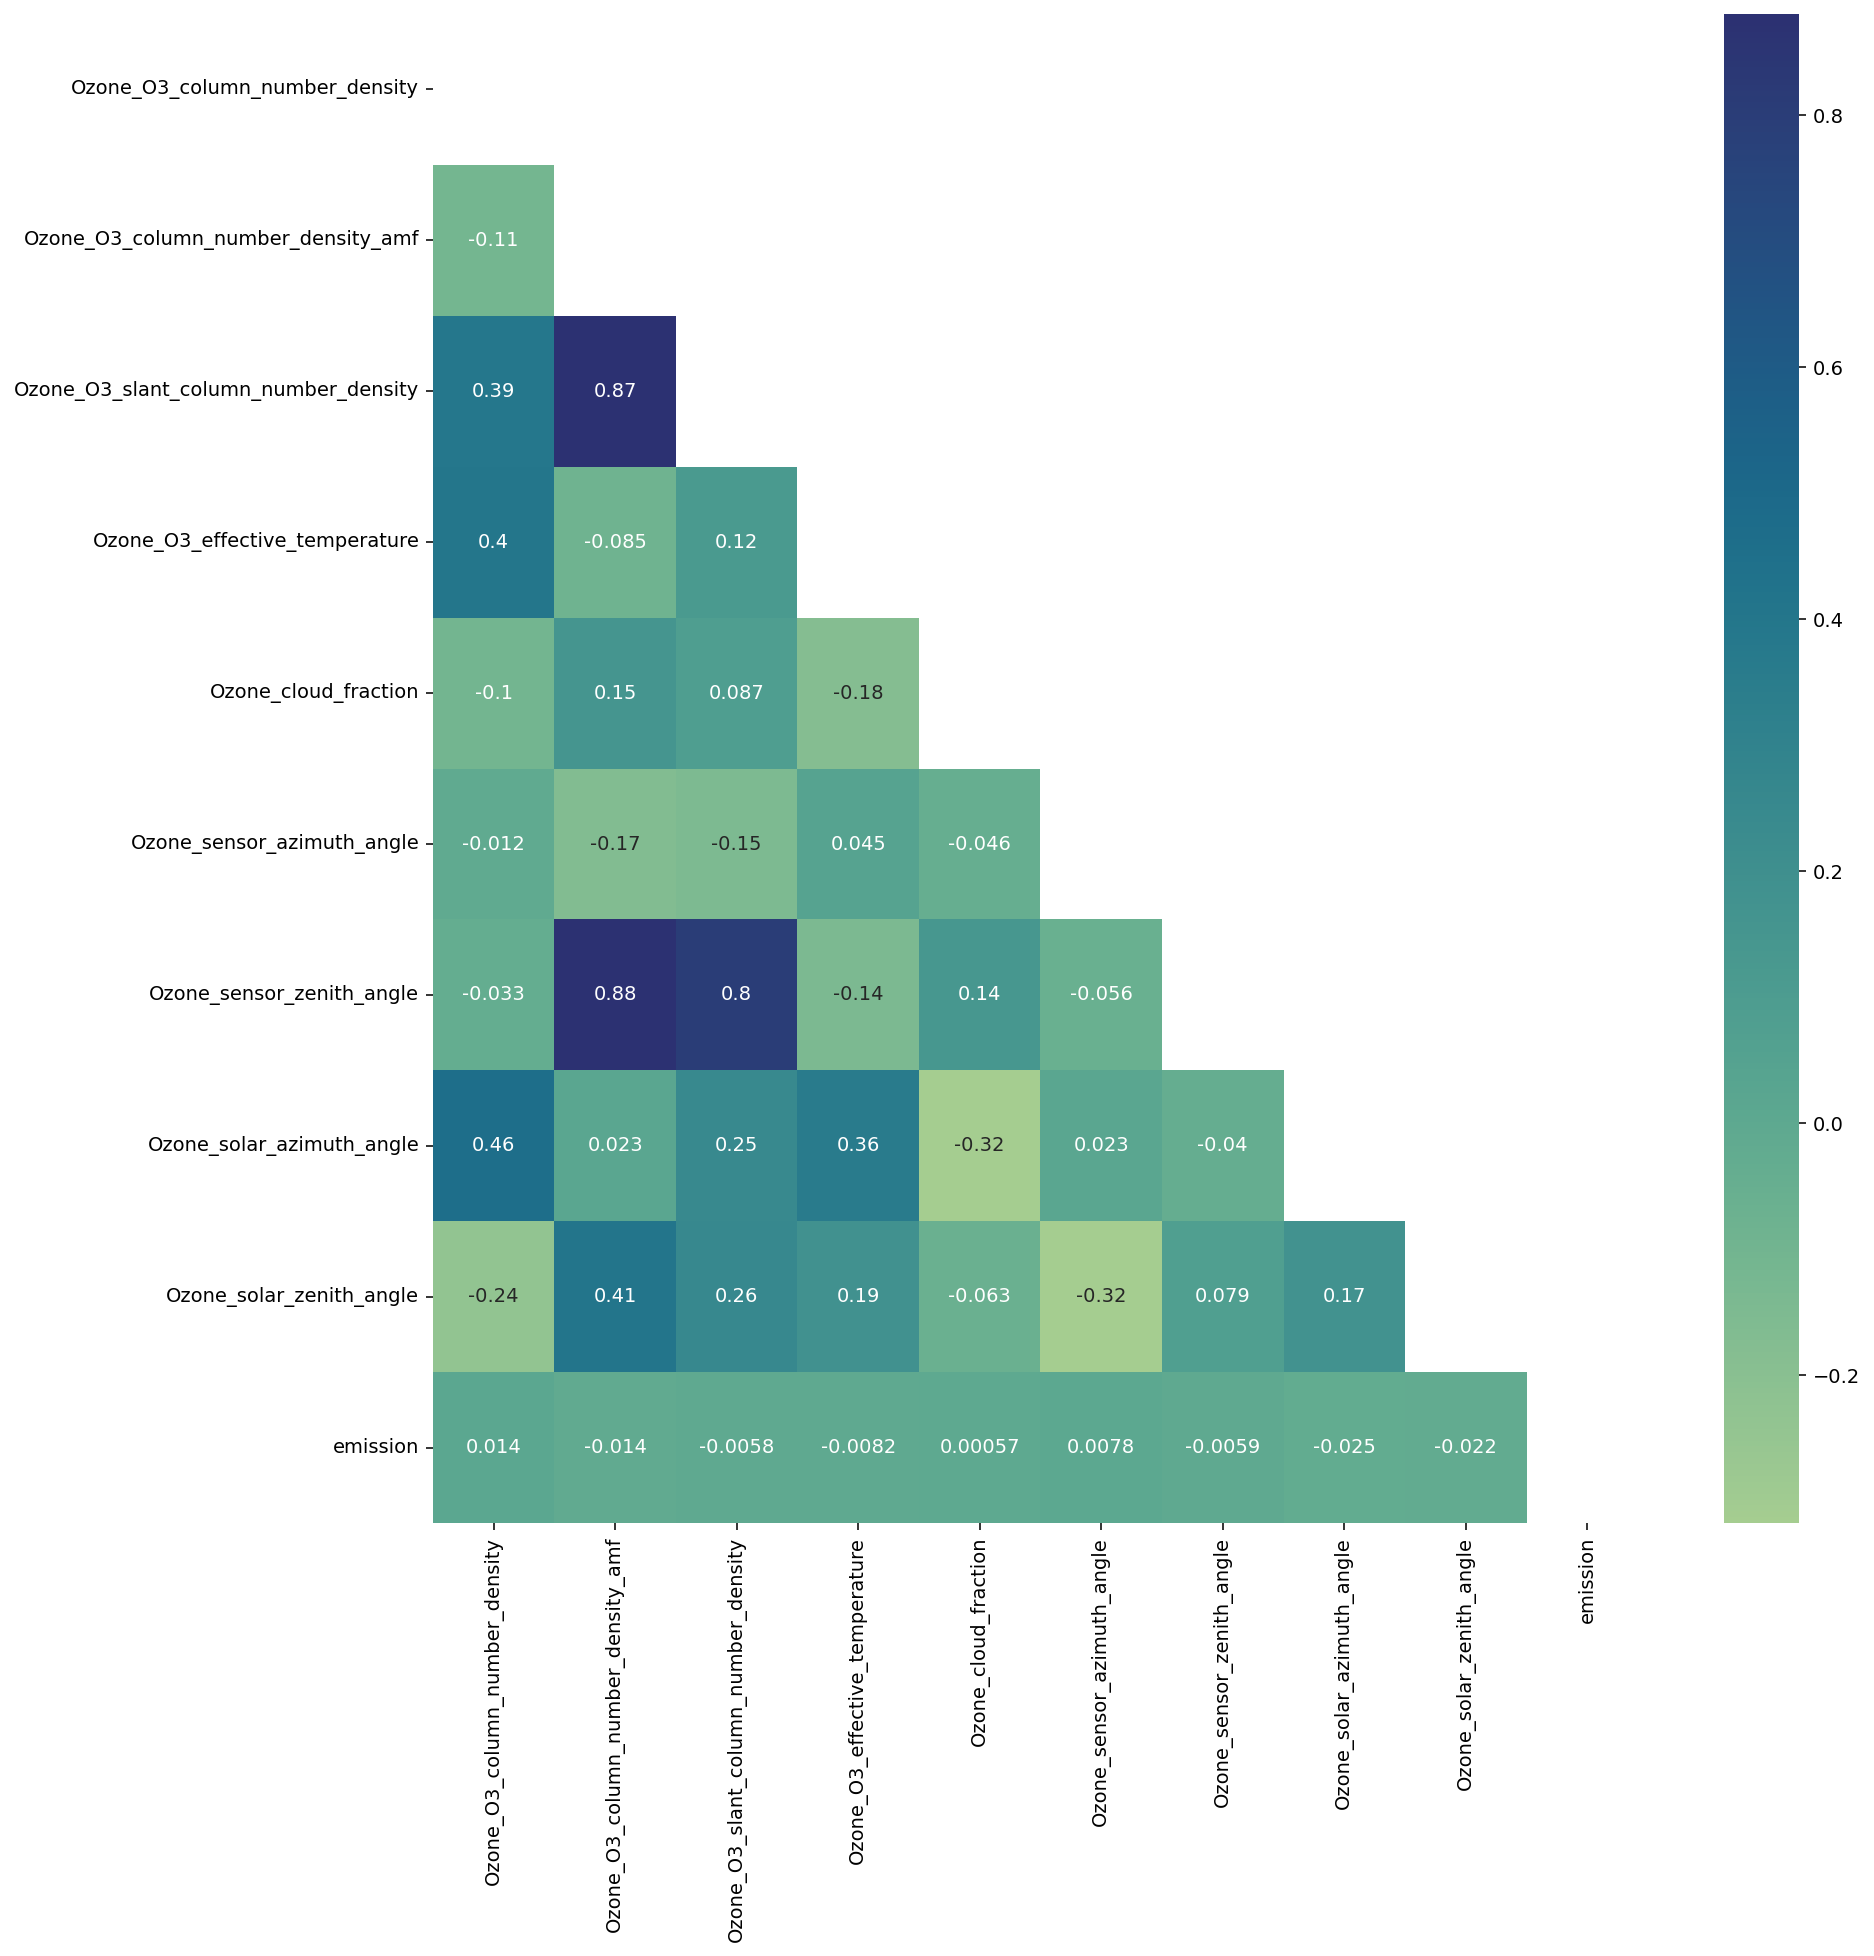

In [35]:
plt.figure(figsize=(14,14), dpi=140)
matrix = np.triu(train_df[ozone_feat].corr())
sns.heatmap(data = train_df[ozone_feat].corr(), annot=True, cmap='crest', mask=matrix)

Relationship between cloud features and Emission«

In [36]:
cloud_feat = ['Cloud_cloud_fraction',
       'Cloud_cloud_top_pressure', 'Cloud_cloud_top_height',
       'Cloud_cloud_base_pressure', 'Cloud_cloud_base_height',
       'Cloud_cloud_optical_depth', 'Cloud_surface_albedo',
       'Cloud_sensor_azimuth_angle', 'Cloud_sensor_zenith_angle',
       'Cloud_solar_azimuth_angle', 'Cloud_solar_zenith_angle', 'emission']

In [37]:
train_df[cloud_feat].corr()['emission']

Cloud_cloud_fraction          0.001249
Cloud_cloud_top_pressure     -0.013932
Cloud_cloud_top_height        0.005374
Cloud_cloud_base_pressure    -0.012997
Cloud_cloud_base_height       0.004032
Cloud_cloud_optical_depth     0.001784
Cloud_surface_albedo          0.046587
Cloud_sensor_azimuth_angle    0.007758
Cloud_sensor_zenith_angle    -0.016042
Cloud_solar_azimuth_angle    -0.024205
Cloud_solar_zenith_angle     -0.021889
emission                      1.000000
Name: emission, dtype: float64

<Axes: >

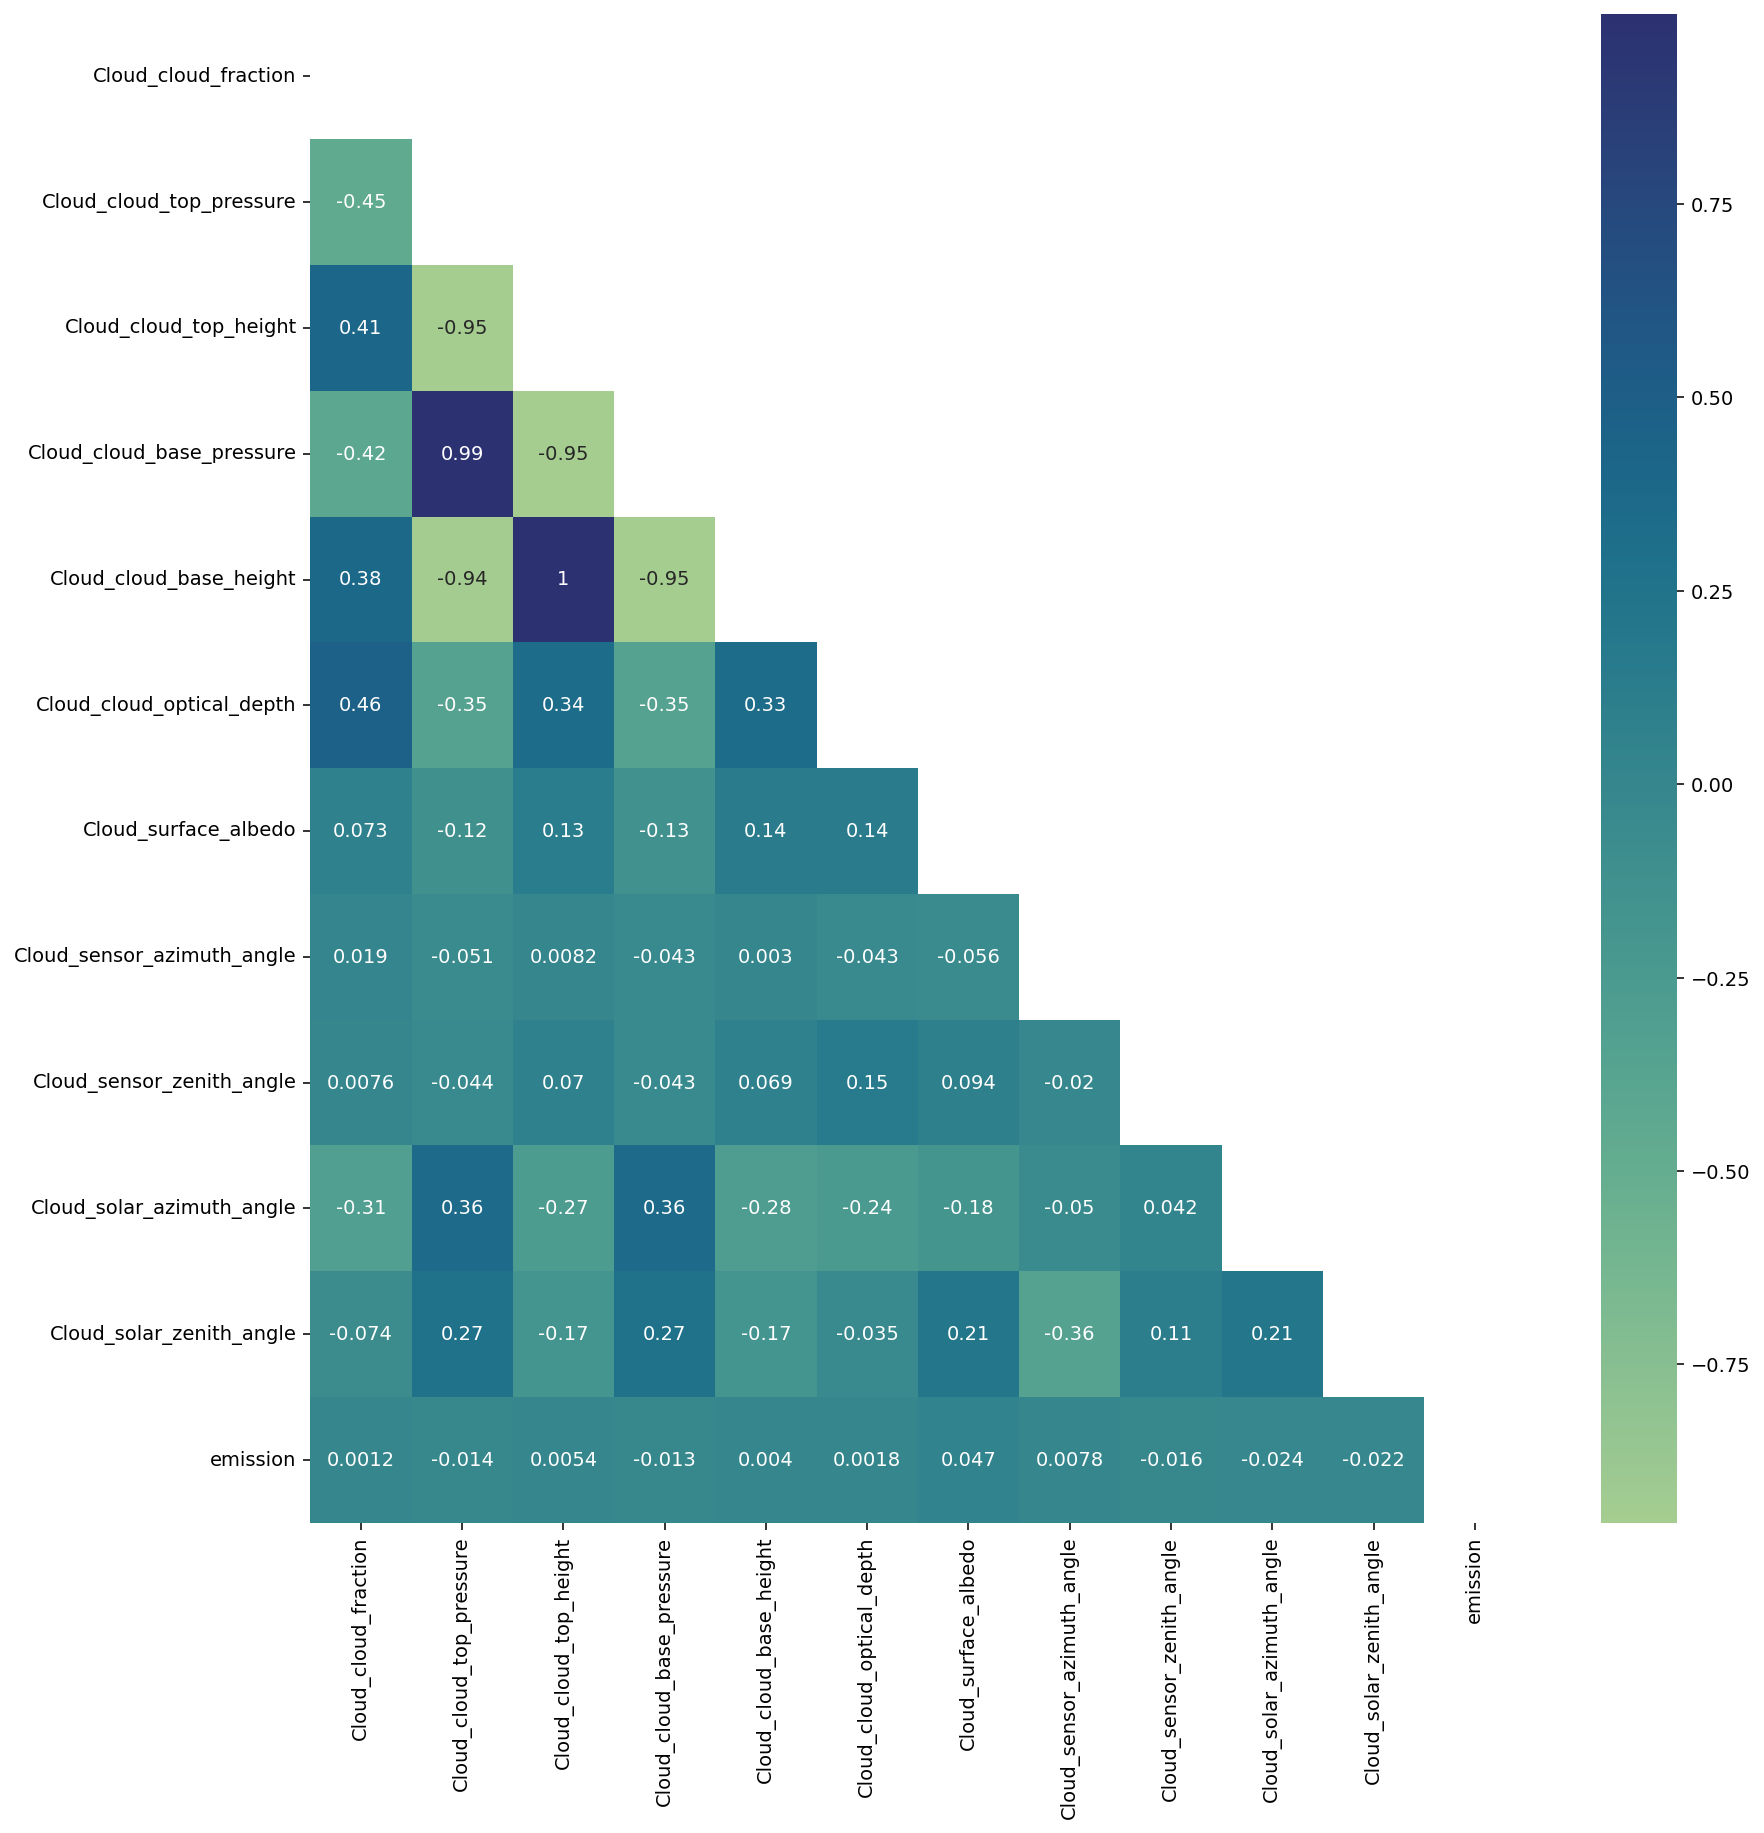

In [38]:
plt.figure(figsize=(14,14), dpi=140)
matrix = np.triu(train_df[cloud_feat].corr())
sns.heatmap(data = train_df[cloud_feat].corr(), annot=True, cmap='crest', mask=matrix)

# Feature Engineering

### Adding Date from week_no. and Year

In [39]:
train_df['Date'] = pd.to_datetime(train_df['year'].astype(str) + '-' + train_df['week_no'].astype(str) + '-0', format='%Y-%W-%w')
test_df['Date'] = pd.to_datetime(test_df['year'].astype(str) + '-' + test_df['week_no'].astype(str) + '-0', format='%Y-%W-%w')

### Adding Month and COVID_effect column

In [40]:
train_df['month'] = train_df['Date'].dt.month
test_df['month'] = test_df['Date'].dt.month

In [41]:
train_df['COVID_effect'] = (train_df.year == 2020) & (train_df.week_no > 8)
test_df['COVID_effect'] = (test_df.year == 2020) & (test_df.week_no > 8)

### Holidays

<h4>Major Holidays in Rwanda</h4>
<ul>
    <li>January first week - New Year</li>
    <li>December last week - Christmas, Boxing Day</li>
    <li>July first week - Independence Day and Libration Day</li>
    <li>April first week - Genocide Memorial Day</li>
</ul>
<h4> So week-no = [0,13,27,51]

In [42]:
train_df['Holidays'] = (train_df['week_no'].isin([0, 51, 13, 27]))
test_df['Holidays'] = (test_df['week_no'].isin([0, 51, 13, 27]))

### Cyclic Coordinates

In [43]:
train_df['rot_15_x'] = (np.cos(np.radians(15)) * train_df['longitude']) + (np.sin(np.radians(15)) * train_df['latitude'])
train_df['rot_15_y'] = (np.cos(np.radians(15)) * train_df['latitude']) + (np.sin(np.radians(15)) * train_df['longitude'])
train_df['rot_30_x'] = (np.cos(np.radians(30)) * train_df['longitude']) + (np.sin(np.radians(30)) * train_df['latitude'])
train_df['rot_30_y'] = (np.cos(np.radians(30)) * train_df['latitude']) + (np.sin(np.radians(30)) * train_df['longitude'])
test_df['rot_15_x'] = (np.cos(np.radians(15)) * test_df['longitude']) + (np.sin(np.radians(15)) * test_df['latitude'])
test_df['rot_15_y'] = (np.cos(np.radians(15)) * test_df['latitude']) + (np.sin(np.radians(15)) * test_df['longitude'])
test_df['rot_30_x'] = (np.cos(np.radians(30)) * test_df['longitude']) + (np.sin(np.radians(30)) * test_df['latitude'])
test_df['rot_30_y'] = (np.cos(np.radians(30)) * test_df['latitude']) + (np.sin(np.radians(30)) * test_df['longitude'])

# Modelling

### Getting the features

In [44]:
feature_required = ['latitude', 'longitude', 'week_no', 'COVID_effect']

In [45]:
# Splitting the Dataset
X = train_df[feature_required]

In [46]:
y = train_df['emission']

### Random Forest Regressor

In [47]:
rfr = RandomForestRegressor(n_estimators = 500)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [49]:
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [50]:
rfr_predictions = rfr.predict(X_test)

In [51]:
np.sqrt(mean_squared_error(y_test, rfr_predictions))

18.602003790847654

### Extra Trees Regressor

In [52]:
etr = ExtraTreesRegressor(n_estimators=500)

In [53]:
etr.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=500)

In [54]:
etr_predictions = etr.predict(X_test)

In [55]:
np.sqrt(mean_squared_error(y_test, etr_predictions))

21.357917182721767

### XGB Regressor

In [56]:
xgbr = XGBRegressor(n_estimators=500)

In [57]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [58]:
xgbr_predictions = xgbr.predict(X_test)

In [59]:
np.sqrt(mean_squared_error(y_test, xgbr_predictions))

18.856563691568656

### Prediction Dataframe

In [60]:
prediction_df = pd.DataFrame(y_test)

In [61]:
prediction_df['rfr_prediction'] = rfr_predictions

In [62]:
prediction_df['etr_predictions'] = etr_predictions

In [63]:
prediction_df['xgbr_predictions'] = xgbr_predictions

In [64]:
prediction_df.columns

Index(['emission', 'rfr_prediction', 'etr_predictions', 'xgbr_predictions'], dtype='object')

In [65]:
weights = Ridge(alpha=0.5).fit(prediction_df[['rfr_prediction', 'etr_predictions', 'xgbr_predictions']], prediction_df['emission']).coef_

In [66]:
pd.DataFrame(weights,index=['rfr_prediction', 'etr_predictions', 'xgbr_predictions'],columns=['weights_per_model'])

weights_per_model
rfr_prediction             1.165067
etr_predictions           -0.768633
xgbr_predictions           0.612616

### Voting Regressor

In [67]:
models = [('rfr', RandomForestRegressor(n_estimators=500)), ('etr', ExtraTreesRegressor(n_estimators=500)), ('xgbr', XGBRegressor(n_estimators=500))]

In [68]:
voter = VotingRegressor(models, weights=weights)

In [69]:
voter.fit(X_train, y_train)

VotingRegressor(estimators=[('rfr', RandomForestRegressor(n_estimators=500)),
                            ('etr', ExtraTreesRegressor(n_estimators=500)),
                            ('xgbr',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=No...
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=500, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...))],
                weights=array([ 1.16506684, -0.76863287,  0.61261578]))

In [70]:
voter_predictions = voter.predict(X_test)

In [71]:
np.sqrt(mean_squared_error(y_test, voter_predictions))

17.40680478306975

# Submission

In [72]:
final_predictions = voter.predict(test_df[['latitude', 'longitude', 'week_no', 'COVID_effect']])

In [73]:
final_pred_df = pd.DataFrame(test_df['ID_LAT_LON_YEAR_WEEK'])

In [74]:
final_pred_df['emission'] = final_predictions

In [75]:
# creating the negative emissions equal to 0
def zero_emission(emission):
    if emission < 0:
        return 0
    else:
        return emission

In [76]:
final_pred_df['emission'] = final_pred_df['emission'].apply(zero_emission)

In [77]:
final_pred_df.to_csv("../submission.csv", index=False)